In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import *
import scipy as sc
from scipy.stats import t,norm
import xarray as xr
from scipy import stats,signal
# from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mplc
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy as cart
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
import shapefile
from cartopy.io.shapereader import Reader
import pandas as pd

In [44]:
data3 = "/home/cccr/roxy/athira/detrends.nc"
b3 = xr.open_dataset(data3)


sst1 = b3.sst.sel(time=slice('1901-06-01','1940-09-30'))
s1= sst1.values.squeeze()
w1 = s1.ravel()
sst2 = b3.sst.sel(time=slice('1941-06-01','1980-09-30'))
s2= sst2.values.squeeze()
w2 = s2.ravel()
sst3 = b3.sst.sel(time=slice('1981-06-01','2018-09-30'))
s3= sst3.values.squeeze()
w3 = s3.ravel()
# sst4 = b3.sst.sel(time=slice('1991-06-01','2018-09-30'))
# s4= sst4.values.squeeze()
# w4 = s4.ravel()

In [45]:
data1 = "/home/cccr/roxy/athira/imddetrend.nc"
data_f = xr.open_dataset(data1)
data = data_f.rf.values
rain1 = data_f.rf.sel(time=slice('1901-06-01','1940-09-30'))
r=rain1.squeeze()


lon = data_f.longitude
lat = data_f.latitude
print(lon.shape)
shape = [1,r.shape[1],r.shape[2]]
regress_map = np.zeros((shape))
cor_map = np.zeros((shape))
significant_map =np.zeros((shape))
 
for i in range(r.shape[2]):
    for j in range(r.shape[1]): 
        temp1= r[:,j,i]
        if np.all(np.isnan(temp1)):
            regress_map[0,j,i]= np.nan
            cor_map[0,j,i]    = np.nan
        else:
            slope,intercept,corr,p1,serr = stats.linregress(w1,temp1)
            regress_map[0,j,i]= slope
            cor_map[0,j,i]    = corr
            significant_map[0,j,i] = p1
            
rain2 = data_f.rf.sel(time=slice('1941-06-01','1980-09-30'))
r2=rain2.squeeze()
shape2 = [1,r2.shape[1],r2.shape[2]]
regress_map2 = np.zeros((shape2))
cor_map2 = np.zeros((shape2))
significant_map2 =np.zeros((shape2))
 
for i in range(r2.shape[2]):
    for j in range(r2.shape[1]): 
        temp2= r2[:,j,i]
        if np.all(np.isnan(temp2)):
            regress_map2[0,j,i]= np.nan
            cor_map2[0,j,i]    = np.nan
        else:
            slope2,intercept2,corr2,p2,serr2 = stats.linregress(w2,temp2)
            regress_map2[0,j,i]= slope2
            cor_map2[0,j,i]    = corr2
            significant_map2[0,j,i] = p2
            
rain3 = data_f.rf.sel(time=slice('1981-06-01','2018-09-30'))
r3=rain3.squeeze()
shape3 = [1,r3.shape[1],r3.shape[2]]
regress_map3 = np.zeros((shape3))
cor_map3 = np.zeros((shape3))
significant_map3 =np.zeros((shape3))
 
for i in range(r3.shape[2]):
    for j in range(r3.shape[1]): 
        temp3= r3[:,j,i]
        if np.all(np.isnan(temp3)):
            regress_map3[0,j,i]= np.nan
            cor_map3[0,j,i]    = np.nan
        else:
            slope3,intercept3,corr3,p3,serr3 = stats.linregress(w3,temp3)
            regress_map3[0,j,i]= slope3
            cor_map3[0,j,i]    = corr3
            significant_map3[0,j,i] = p3
            
# rain4 = data_f.rf.sel(time=slice('1991-06-01','2018-09-30'))
# r4=rain4.squeeze()
# shape4 = [1,r4.shape[1],r4.shape[2]]
# regress_map4 = np.zeros((shape4))
# cor_map4 = np.zeros((shape4))
# significant_map4 =np.zeros((shape4))
 
# for i in range(r4.shape[2]):
#     for j in range(r3.shape[1]): 
#         temp4= r4[:,j,i]
#         if np.all(np.isnan(temp4)):
#             regress_map4[0,j,i]= np.nan
#             cor_map4[0,j,i]    = np.nan
#         else:
#             slope4,intercept4,corr4,p4,serr4 = stats.linregress(w4,temp4)
#             regress_map4[0,j,i]= slope4
#             cor_map4[0,j,i]    = corr4
#             significant_map4[0,j,i] = p4




(135,)


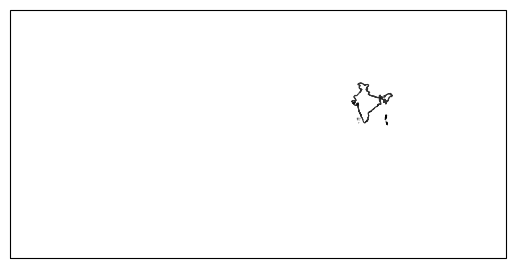

In [46]:
fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'


axiom = plt.axes(projection=ccrs.PlateCarree())
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none',edgecolor='k',linewidth=0.8,linestyle="-",alpha=0.8)
axiom.add_feature(shape_feature)

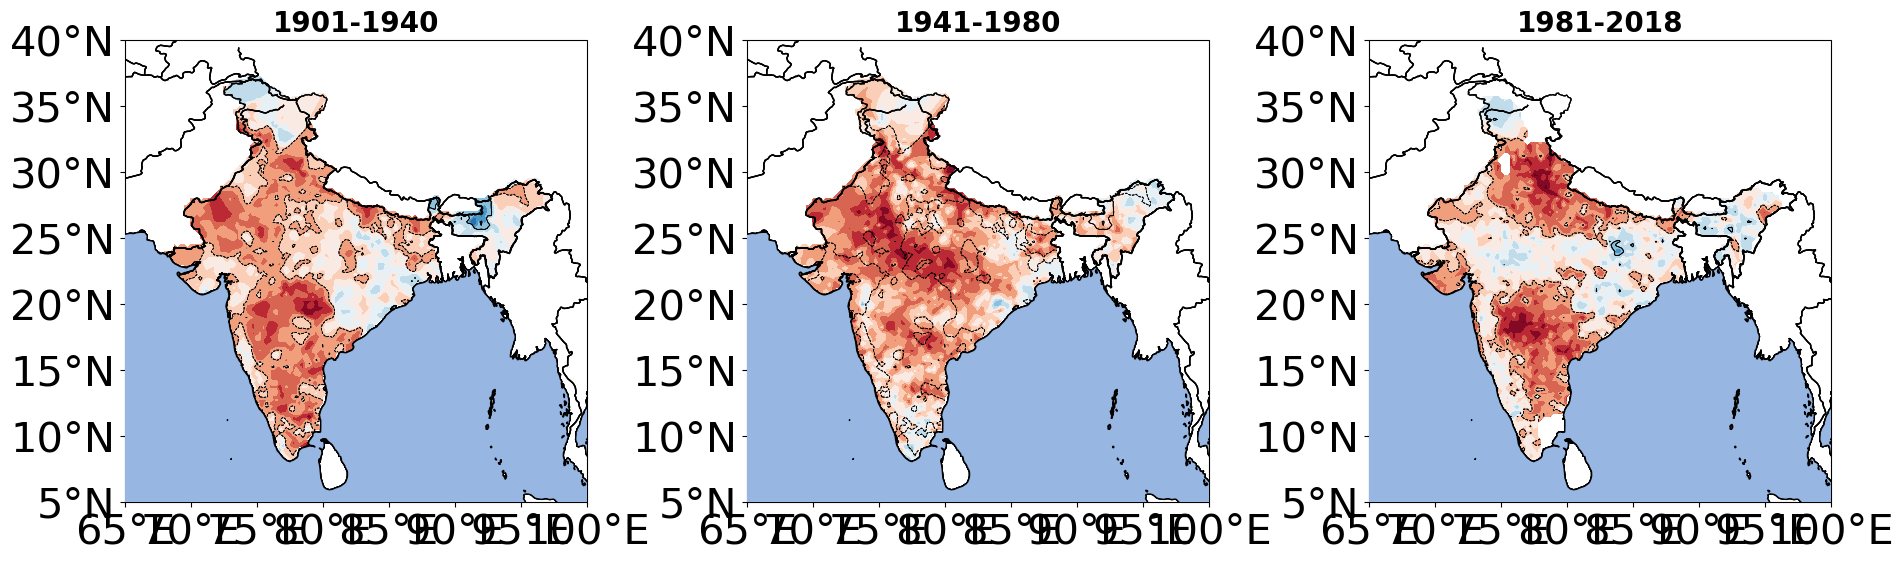

In [47]:
proj=ccrs.PlateCarree(central_longitude=180.0)
fig, axiom = plt.subplots(1,3,figsize=(3,6), subplot_kw=dict(projection=proj))


for i in range(3):
    
    v         =    np.arange(-0.6,0.7,0.1)
    
    plotted1=axiom[0].contourf(lon,lat,cor_map[0,:,:],v, cmap='RdBu',extend='both',transform = ccrs.PlateCarree())
    axiom[0].contour(lon,lat,cor_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
    axiom[0].set_xticks([65, 70, 75, 80 , 85, 90, 95, 100], crs=ccrs.PlateCarree())
    axiom[0].set_yticks([5, 10, 15, 20, 25, 30, 35, 40], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    axiom[0].xaxis.set_major_formatter(lon_formatter)
    axiom[0].yaxis.set_major_formatter(lat_formatter)
    axiom[0].coastlines()
    axiom[0].add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
    axiom[0].add_feature(cartopy.feature.BORDERS.with_scale('50m'))
    axiom[0].add_feature(shape_feature)
    axiom[0].set_title('1901-1940',fontweight="bold", size=20)
    
    plotted2=axiom[1].contourf(lon,lat,cor_map2[0,:,:],v, cmap='RdBu',extend='both',transform = ccrs.PlateCarree())
    axiom[1].contour(lon,lat,cor_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
    axiom[1].set_xticks([65, 70, 75, 80 , 85, 90, 95, 100], crs=ccrs.PlateCarree())
    axiom[1].set_yticks([5, 10, 15, 20, 25, 30, 35, 40], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    axiom[1].xaxis.set_major_formatter(lon_formatter)
    axiom[1].yaxis.set_major_formatter(lat_formatter)
    axiom[1].coastlines()
    axiom[1].add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
    axiom[1].add_feature(cartopy.feature.BORDERS.with_scale('50m'))
    axiom[1].add_feature(shape_feature)
    axiom[1].set_title('1941-1980',fontweight="bold", size=20)
    plotted3=axiom[2].contourf(lon,lat,cor_map3[0,:,:],v, cmap='RdBu',extend='both',transform = ccrs.PlateCarree())
    axiom[2].contour(lon,lat,cor_map3[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
    axiom[2].set_xticks([65, 70, 75, 80 , 85, 90, 95, 100], crs=ccrs.PlateCarree())
    axiom[2].set_yticks([5, 10, 15, 20, 25, 30, 35, 40], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    axiom[2].xaxis.set_major_formatter(lon_formatter)
    axiom[2].yaxis.set_major_formatter(lat_formatter)
    axiom[2].coastlines()
    axiom[2].add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
    axiom[2].add_feature(cartopy.feature.BORDERS.with_scale('50m'))
    axiom[2].add_feature(shape_feature)
    axiom[2].set_title('1981-2018',fontweight="bold", size=20)
    
#     plotted4=axiom[1,1].contourf(lon,lat,cor_map4[0,:,:],v, cmap='RdBu',extend='both',transform = ccrs.PlateCarree())
#     axiom[1,1].contour(lon,lat,cor_map4[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())

    
    
#     axiom[1,1].set_xticks([65, 70, 75, 80 , 85, 90, 95, 100], crs=ccrs.PlateCarree())
#     axiom[1,1].set_yticks([5, 10, 15, 20, 25, 30, 35, 40], crs=ccrs.PlateCarree())
#     lon_formatter = LongitudeFormatter(zero_direction_label=True)
#     lat_formatter = LatitudeFormatter()
#     axiom[1,1].xaxis.set_major_formatter(lon_formatter)
#     axiom[1,1].yaxis.set_major_formatter(lat_formatter)
#     axiom[1,1].coastlines()
#     axiom[1,1].add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
#     axiom[1,1].add_feature(cartopy.feature.BORDERS.with_scale('50m'))
#     axiom[1,1].add_feature(shape_feature)
    
    
    

fig.subplots_adjust(right=6)

plt.subplots_adjust(hspace=0)

# ax_cbar1 = fig.add_axes()
# plt.colorbar(plotted1, ax=axiom[0])
# ax_cbar1= fig.add_axes()
# plt.colorbar(plotted1,fraction=0.1,  ax=axiom[0],orientation='vertical')
# ax_cbar2= fig.add_axes()
# plt.colorbar(plotted2,fraction=0.1,  ax=axiom[1],orientation='vertical')
# ax_cbar3= fig.add_axes()
# plt.colorbar(plotted3,fraction=0.1,  ax=axiom[2],orientation='vertical')

plt.show()

# fig.savefig('Desktop/DATA' +'ismrevolution.png',  bbox_inches='tight', pad_inches=0.5, dpi=150)

In [48]:
data3 = "/home/cccr/roxy/athira/detrends.nc"
b3 = xr.open_dataset(data3)


sst3 = b3.sst.sel(time=slice('1901-06-01','2018-09-30'))
s= sst3.values.squeeze()
w = s.ravel()


data1 = "/home/cccr/roxy/athira/imddetrend.nc"
data_f = xr.open_dataset(data1)
data = data_f.rf.values
rain1 = data_f.rf.sel(time=slice('1901-06-01','2018-09-30'))
r=rain1.squeeze()


lon = data_f.longitude
lat = data_f.latitude

shape = [1,r.shape[1],r.shape[2]]
regress_map = np.zeros((shape))
corr_map = np.zeros((shape))
significant_map =np.zeros((shape))
 
for i in range(r.shape[2]):
    for j in range(r.shape[1]): 
        temp= r[:,j,i]
        if np.all(np.isnan(temp)):
            regress_map[0,j,i]= np.nan
            corr_map[0,j,i]    = np.nan
        else:
            slope,intercept,corr,p1,serr = stats.linregress(w,temp)
            regress_map[0,j,i]= slope
            corr_map[0,j,i]    = corr
            significant_map[0,j,i] = p1

               


In [49]:
data1 = "/home/cccr/roxy/athira/fldmeanimd.nc"
data = "/home/cccr/roxy/athira/sstfld.nc"
a = xr.open_dataset(data1)

b= xr.open_dataset(data)

sst1 = b.sst.sel(time=slice('1901-06-01','2018-09-30'))
nino34=sst1.squeeze()

rain1 = a.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_all_india = rain1.squeeze()
ccor_all_india = np.zeros(89)

for k in range(0, 89):
    temrain   =  rain_all_india[k:k+30]
    temsst    =  nino34[k:k+30]
    ccor_all_india[k] = np.corrcoef(temrain,temsst)[0,1]
    
# plt.figure(figsize=(20,8))
# plt.rcParams['font.size']=20
         
# # plt.plot(np.arange(1915,2004,1),ccor_all_india)
# plt.plot(np.arange(1915,2004,1),ccor_all_india, 'k',linewidth=2.5, label ='All India')
# plt.axvline(x=1940, color='k',linestyle='--',linewidth=2)
# plt.axvline(x=1980, color='k',linestyle='--',linewidth=2)

In [60]:
matrix3 = np.loadtxt("/home/cccr/roxy/athira/biplot_monsoon/nao.txt")

year=matrix3[:,0]
data=matrix3[:,1:]
ind1= np.where((year==1901))[0][0]
ind2= np.where((year==2018))[0][0]
year1=matrix3[ind1:ind2+1,0]
data1=matrix3[ind1:ind2+1,1:]
data1_df=pd.DataFrame(data1,index=year1)
aa=data1_df.iloc[:,[5,6,7,8]].values.ravel()
a=pd.Series(aa,pd.date_range('1/06/1901', periods=len(aa), freq='T'))
bb=a.resample('4T').mean().values
index1 = pd.date_range(start=pd.datetime(1901,6,1),periods=len(bb),freq='AS-JUL')
b=pd.Series(bb,index = index1)


nao_df=pd.DataFrame(b, index=index1, columns=['NAO'])
d= signal.detrend(nao_df.values.squeeze())
nao_df_detrend=pd.DataFrame(d, index=index1, columns=[' NAO '])

data1 = "/home/cccr/roxy/athira/fldmeanimd.nc"
data = "/home/cccr/roxy/athira/sstfld.nc"
a = xr.open_dataset(data1)
rain1 = a.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_all_india = rain1.squeeze()
ccor_nao_all_india = np.zeros(89)

for k in range(0, 89):
    temrain   =  rain_all_india[k:k+30]
    temnao    =  nao_df.values.squeeze()[k:k+30]
    ccor_nao_all_india[k] = np.corrcoef(temrain,temnao)[0,1]
    

/tmp/ipykernel_31977/3419995456.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  index1 = pd.date_range(start=pd.datetime(1901,6,1),periods=len(bb),freq='AS-JUL')


In [61]:
# data1 = "/home/cccr/roxy/athira/biplot_monsoon/amo.txt"
matrix1 = np.loadtxt("/home/cccr/roxy/athira/biplot_monsoon/amo.txt")

year=matrix1[:,0]
data=matrix1[:,1:]
ind1= np.where((year==1901))[0][0]
ind2= np.where((year==2018))[0][0]
year1=matrix1[ind1:ind2+1,0]
data1=matrix1[ind1:ind2+1,1:]
data1_df=pd.DataFrame(data1,index=year1)
aa=data1_df.iloc[:,[5,6,7,8]].values.ravel()
a=pd.Series(aa,pd.date_range('1/06/1901', periods=len(aa), freq='T'))
bb=a.resample('4T').mean().values
index1 = pd.date_range(start=pd.datetime(1901,6,1),periods=len(bb),freq='AS-JUL')
b=pd.Series(bb,index = index1)


amo_df=pd.DataFrame(b, index=index1, columns=['AMO'])
d= signal.detrend(amo_df.values.squeeze())
amo_df_detrend=pd.DataFrame(d, index=index1, columns=[' AMO '])
data1 = "/home/cccr/roxy/athira/fldmeanimd.nc"
data = "/home/cccr/roxy/athira/sstfld.nc"
a = xr.open_dataset(data1)
rain1 = a.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_all_india = rain1.squeeze()
ccor_amo_all_india = np.zeros(89)

for k in range(0, 89):
    temrain   =  rain_all_india[k:k+30]
    temamo    =  amo_df.values.squeeze()[k:k+30]
    ccor_amo_all_india[k] = np.corrcoef(temrain,temamo)[0,1]
    

/tmp/ipykernel_31977/275923777.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  index1 = pd.date_range(start=pd.datetime(1901,6,1),periods=len(bb),freq='AS-JUL')


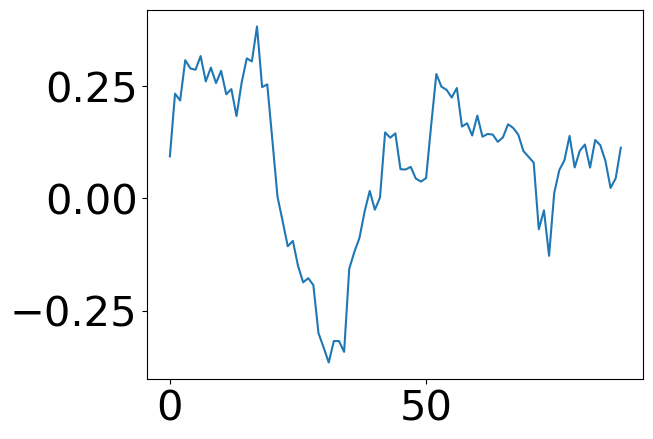

In [63]:
plt.plot(ccor_amo_all_india)

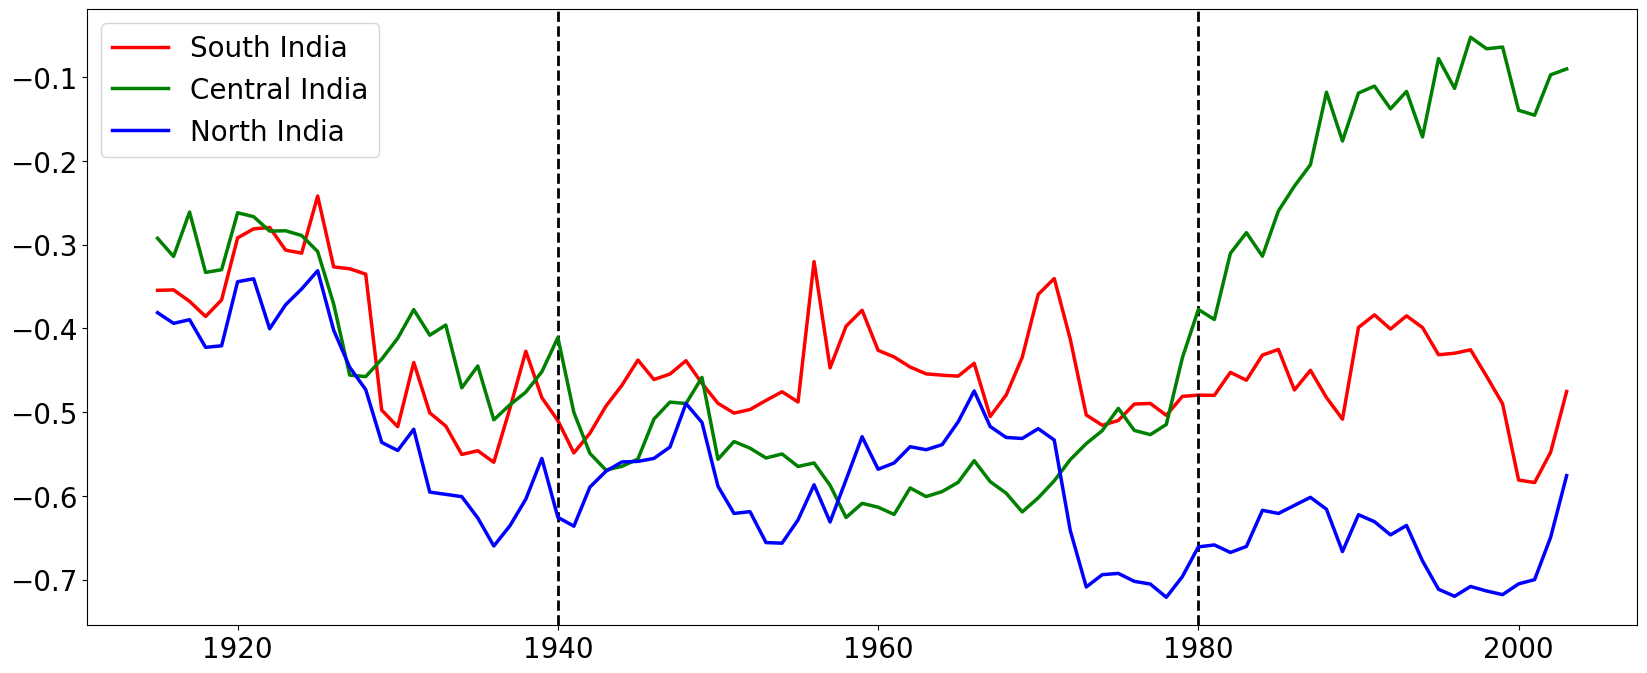

In [10]:
data2 = "/home/cccr/roxy/athira/southbox_imd_V2.nc"
a1 = xr.open_dataset(data2)



rain2 = a1.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_south_india=rain2.squeeze()

ccor_south_india = np.zeros(89)
for k in range(0, 89):
    temprain=rain_south_india[k:k+30]
    tempsst=nino34[k:k+30]
    ccor_south_india[k] = np.corrcoef(temprain,tempsst)[0,1]

data3 = "/home/cccr/roxy/athira/centralbox_imd_V2.nc"
a2 = xr.open_dataset(data3)



rain3 = a2.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_central_india=rain3.squeeze()

ccor_central_india = np.zeros(89)
for k in range(0, 89):
    temrain = rain_central_india[k:k+30]
    temsst  = nino34[k:k+30]
    ccor_central_india[k] = np.corrcoef(temrain,temsst)[0,1]
    
         

data4 = "/home/cccr/roxy/athira/northbox_imd_V2.nc"
a3 = xr.open_dataset(data4)



rain4 = a3.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_north_india=rain4.squeeze()
ccor_north_india = np.zeros(89)

for k in range(0, 89):
    temrain  =  rain_north_india[k:k+30]
    temsst   =   nino34[k:k+30]
    ccor_north_india[k] = np.corrcoef(temrain,temsst)[0,1]
plt.figure(figsize=(20,8))
plt.rcParams['font.size']=20

# plt.plot(np.arange(1915,2004,1),ccor_all_india, 'k', label ='All India')
plt.plot(np.arange(1915,2004,1),ccor_south_india, 'r',linewidth=2.5, label ='South India')

plt.axvline(x=1940, color='k',linestyle='--',linewidth=2)
plt.axvline(x=1980, color='k',linestyle='--',linewidth=2)

plt.legend(loc="best")
plt.plot(np.arange(1915,2004,1),ccor_central_india, 'g',linewidth=2.5 ,label ='Central India')
plt.legend(loc="best")
plt.plot(np.arange(1915,2004,1),ccor_north_india, 'b',linewidth=2.5, label ='North India')
plt.legend(loc="best")    

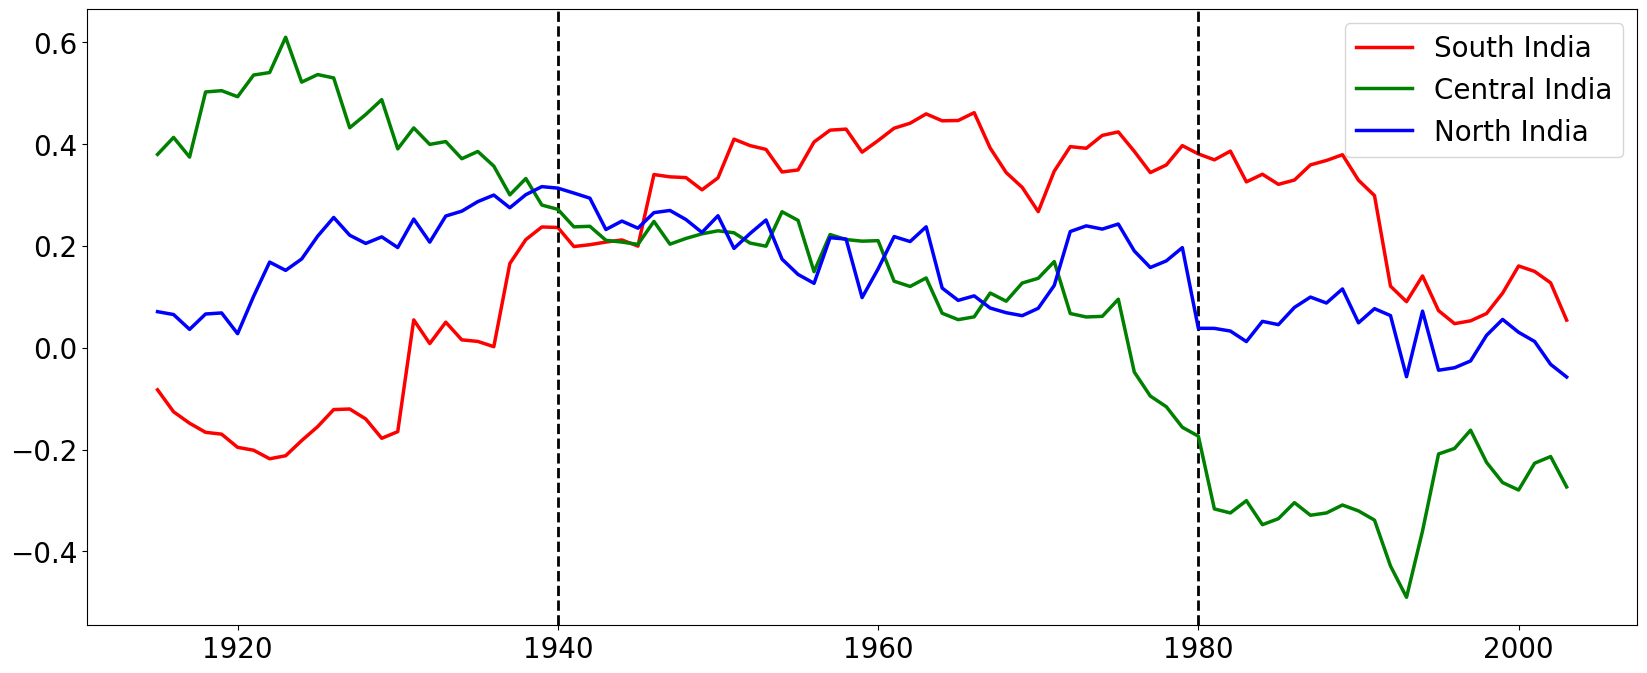

In [85]:
data2 = "/home/cccr/roxy/athira/southbox_imd_V2.nc"
a1 = xr.open_dataset(data2)



rain2 = a1.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_south_india=rain2.squeeze()

ccor_nao_south_india = np.zeros(89)
for k in range(0, 89):
    temprain=rain_south_india[k:k+30]
    tempsst=nao_df.values.squeeze()[k:k+30]
    ccor_nao_south_india[k] = np.corrcoef(temprain,tempsst)[0,1]

data3 = "/home/cccr/roxy/athira/centralbox_imd_V2.nc"
a2 = xr.open_dataset(data3)



rain3 = a2.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_central_india=gp.values.squeeze()#rain3.squeeze()

ccor_nao_central_india = np.zeros(89)
for k in range(0, 89):
    temrain = rain_central_india[k:k+30]
    temsst  = nao_df.values.squeeze()[k:k+30]
    ccor_nao_central_india[k] = np.corrcoef(temrain,temsst)[0,1]
    
         

data4 = "/home/cccr/roxy/athira/northbox_imd_V2.nc"
a3 = xr.open_dataset(data4)



rain4 = a3.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_north_india=rain4.squeeze()
ccor_nao_north_india = np.zeros(89)

for k in range(0, 89):
    temrain  =  rain_north_india[k:k+30]
    temsst   =   nao_df.values.squeeze()[k:k+30]
    ccor_nao_north_india[k] = np.corrcoef(temrain,temsst)[0,1]
plt.figure(figsize=(20,8))
plt.rcParams['font.size']=20

# plt.plot(np.arange(1915,2004,1),ccor_nao_all_india, 'k', label ='All India')
plt.plot(np.arange(1915,2004,1),ccor_nao_south_india, 'r',linewidth=2.5, label ='South India')

plt.axvline(x=1940, color='k',linestyle='--',linewidth=2)
plt.axvline(x=1980, color='k',linestyle='--',linewidth=2)

plt.legend(loc="best")
plt.plot(np.arange(1915,2004,1),ccor_nao_central_india, 'g',linewidth=2.5 ,label ='Central India')
plt.legend(loc="best")
plt.plot(np.arange(1915,2004,1),ccor_nao_north_india, 'b',linewidth=2.5, label ='North India')
plt.legend(loc="best")    


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import shapefile
import matplotlib.patches as mpatches
import nclcmaps2 
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
cmap3=nclcmaps2.cmap('BlueWhiteOrangeRed')

In [65]:
data1 = "/home/cccr/roxy/athira/imddetrend.nc"
data = "/home/cccr/roxy/athira/detrends.nc"
a = xr.open_dataset(data1)
b= xr.open_dataset(data)

sst1 = b.sst.sel(time=slice('1901-06-01','2018-09-30'))
s=sst1.squeeze()

rain1 = a.rf.sel(time=slice('1901-06-01','2018-09-30'))
r=rain1.squeeze()
np.nanmax(r.values)

95.72094

In [67]:
ccor_nao = np.zeros((r.shape[1],r.shape[2]))

lon = a.longitude
lat = a.latitude

for i in range(len(lon)):
    for j in range(len(lat)):
        temp_cor = np.zeros(87)
        for k in range(0,87):
            temrain   =r[k:k+30,j,i]
            temnao    =nao_df.values.squeeze()[k:k+30]
            temp_cor[k]= np.corrcoef(temrain,temnao)[0,1]
        ccor_nao[j,i]=np.nanstd(temp_cor)
#         print(j,i)
ccor_ds = xr.Dataset({'ccor': (('lat','lon'), ccor_nao)}, coords={'latitude': a.latitude,'longitude': a.longitude})
ccor_ds.to_netcdf('ccor_30yrs_ismr_nao.nc') 

/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [13]:
# np.load('ccor_ds.npy')

In [70]:
ccor_ds = xr.open_dataset("ccor_30yrs_ismr_nino.nc")
ccor_ds.ccor.values[50:55,50:55]

array([[0.13951691, 0.17484496, 0.18415834, 0.17402541, 0.16114282],
       [0.10983003, 0.10556871, 0.10197937, 0.14153284, 0.18446966],
       [0.11808458, 0.10598799, 0.08968874, 0.14044188, 0.14588443],
       [0.09307617, 0.08506778, 0.07861152, 0.0834166 , 0.11078844],
       [0.09934838, 0.11231781, 0.13093559, 0.06995088, 0.12001479]])

In [68]:
ccor_nao_ds = xr.open_dataset("ccor_30yrs_ismr_nao.nc")
ccor_nao_ds.ccor.values[50:55,50:55]

array([[0.1178784 , 0.116493  , 0.14225042, 0.12378902, 0.11415935],
       [0.06473463, 0.0645943 , 0.07650149, 0.07298322, 0.07275091],
       [0.0739151 , 0.08057607, 0.08251317, 0.09599904, 0.0806341 ],
       [0.10858607, 0.09668867, 0.08035516, 0.08393326, 0.08156123],
       [0.09310604, 0.09027672, 0.13768931, 0.10793125, 0.09814965]])

In [84]:
gp = r.sel(longitude=slice(83,87),latitude=slice(22,26)).mean(['latitude','longitude'])
# gp.plot()

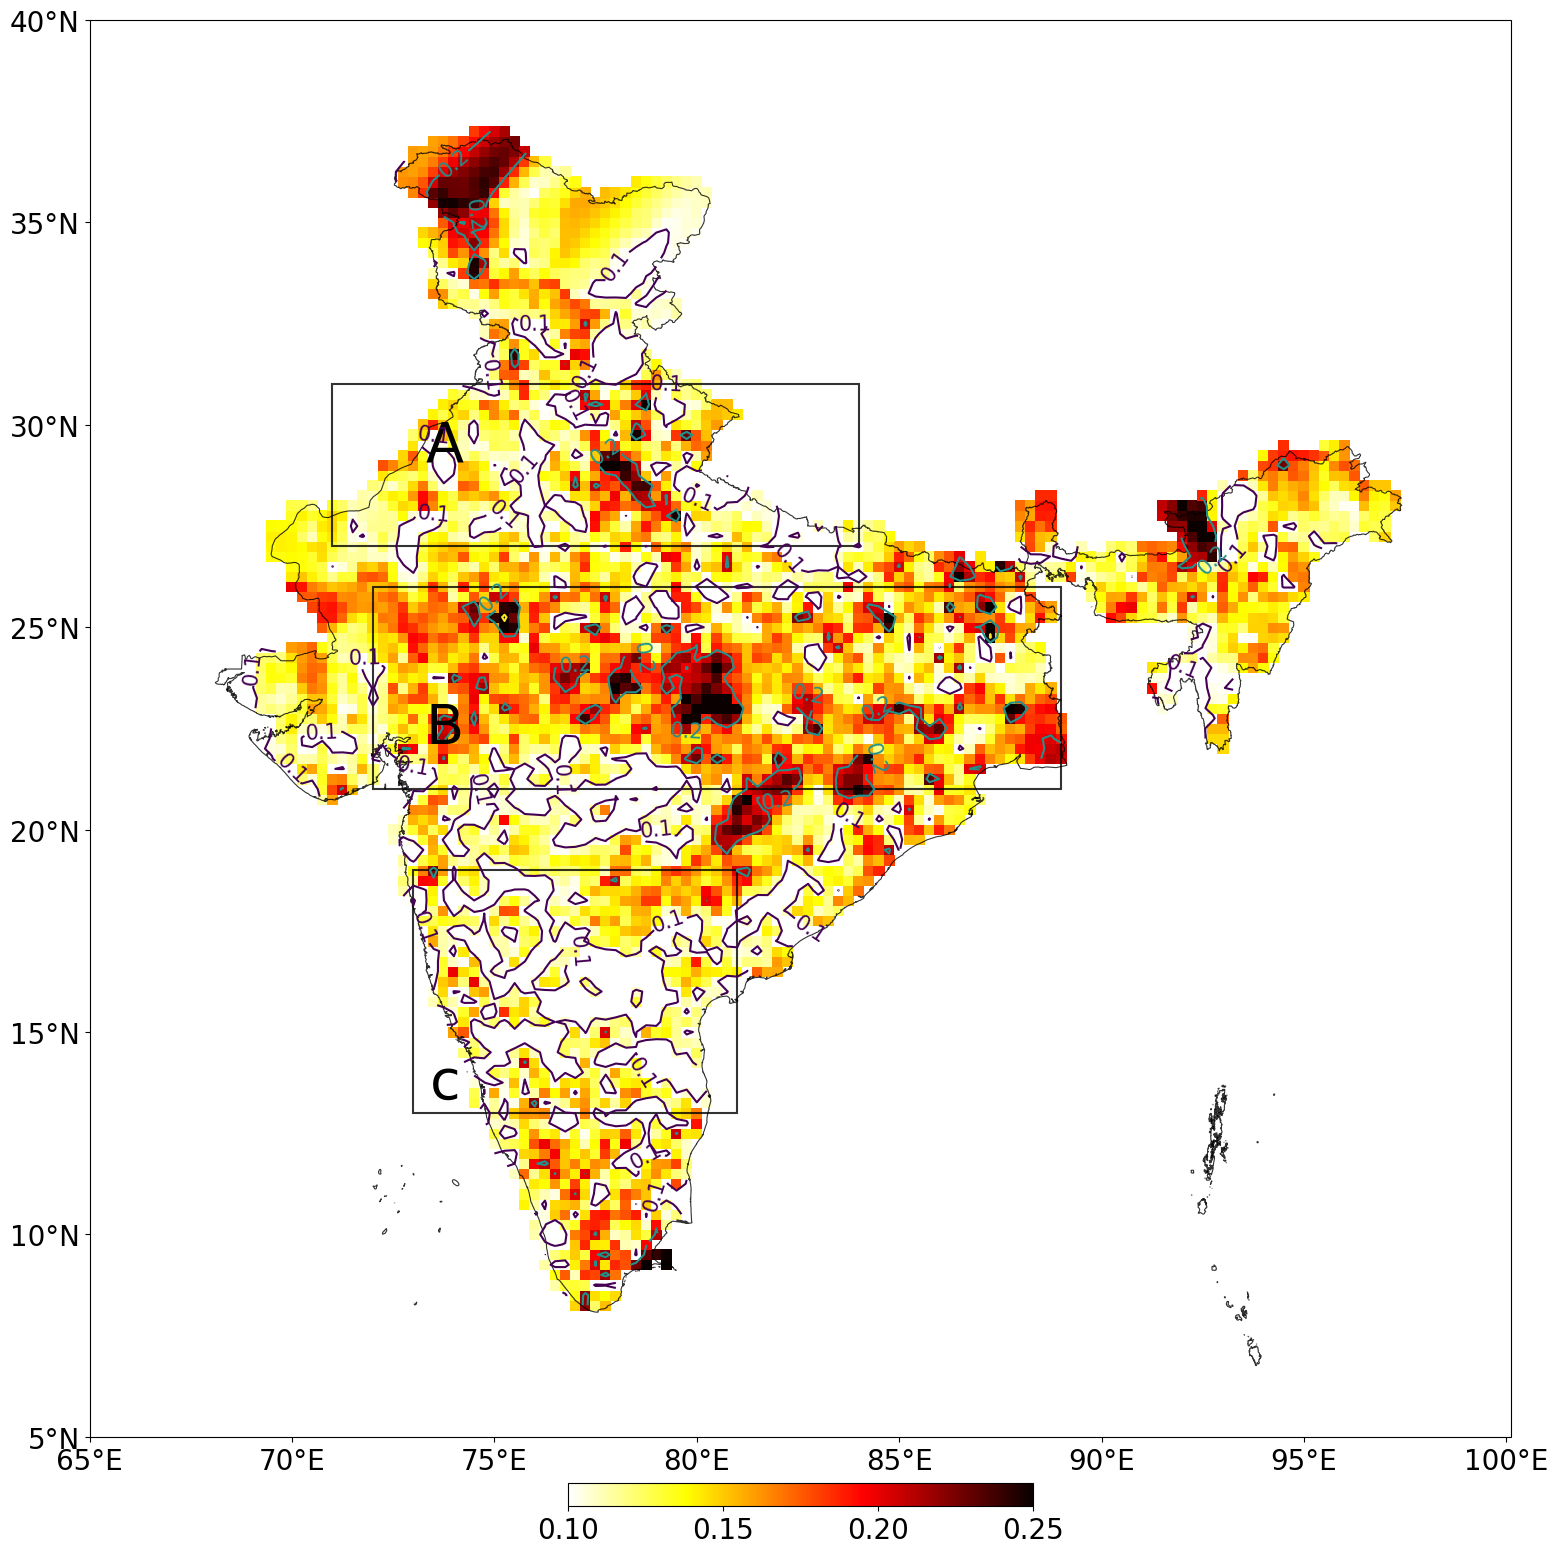

In [75]:
plt.figure(figsize=(20,20))
plt.rcParams['font.size'] = 20
axiom = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180.0))

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axiom.xaxis.set_major_formatter(lon_formatter)
axiom.yaxis.set_major_formatter(lat_formatter)


cs = axiom.pcolor(ccor_ds.longitude,ccor_ds.latitude,ccor_ds['ccor'],cmap=mpl.cm.get_cmap('hot').reversed(),vmin=0.1,vmax=0.25,transform=ccrs.PlateCarree())
cs1 =axiom.contour(ccor_ds.longitude,ccor_ds.latitude,ccor_ds['ccor'],levels= [0.10,0.20,0.30],color='k',inline= 1,fontsize=19,transform=ccrs.PlateCarree())
axiom.clabel(cs1, inline=1, fontsize=15)
axiom.set_xticks([65, 70, 75, 80 , 85, 90, 95, 100], crs=ccrs.PlateCarree())
axiom.set_yticks([5, 10, 15, 20, 25, 30, 35, 40], crs=ccrs.PlateCarree())
# fname='new_shape/India_Boundary.shp'

# shape_feature = ShapelyFeature(Reader(fname).geometries(),
#                                 ccrs.PlateCarree(), facecolor='none',edgecolor='k')
axiom.add_feature(shape_feature)


## south box
axiom.add_patch(mpatches.Rectangle(xy=[73, 13], width=8, height=6,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                   alpha=.8,
                                   antialiased=True,
                                   transform=ccrs.PlateCarree())
                 ) 
## central 
axiom.add_patch(mpatches.Rectangle(xy=[72, 21], width=17 ,height=5,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                    alpha=.8,
                                   antialiased=True,
                                    transform=ccrs.PlateCarree())
               )

axiom.add_patch(mpatches.Rectangle(xy=[71, 27], width=13 ,height=4,

                   facecolor='None',
                   linewidth='1.5',

                   edgecolor='black',
                    alpha=.8,
                   antialiased=True,
                    transform=ccrs.PlateCarree())
               )
from pylab import figure, text
text(0.25, 0.7,'A', ha='center', va='center',fontsize=40, transform=axiom.transAxes) 
text(0.25, 0.5,'B', ha='center', va='center',fontsize=40, transform=axiom.transAxes)                 
text(0.25, 0.25,'c', ha='center', va='center',fontsize=40, transform=axiom.transAxes)                 

cbar =  plt.colorbar(cs, fraction=0.05,shrink=0.3, orientation='horizontal',pad=0.03)



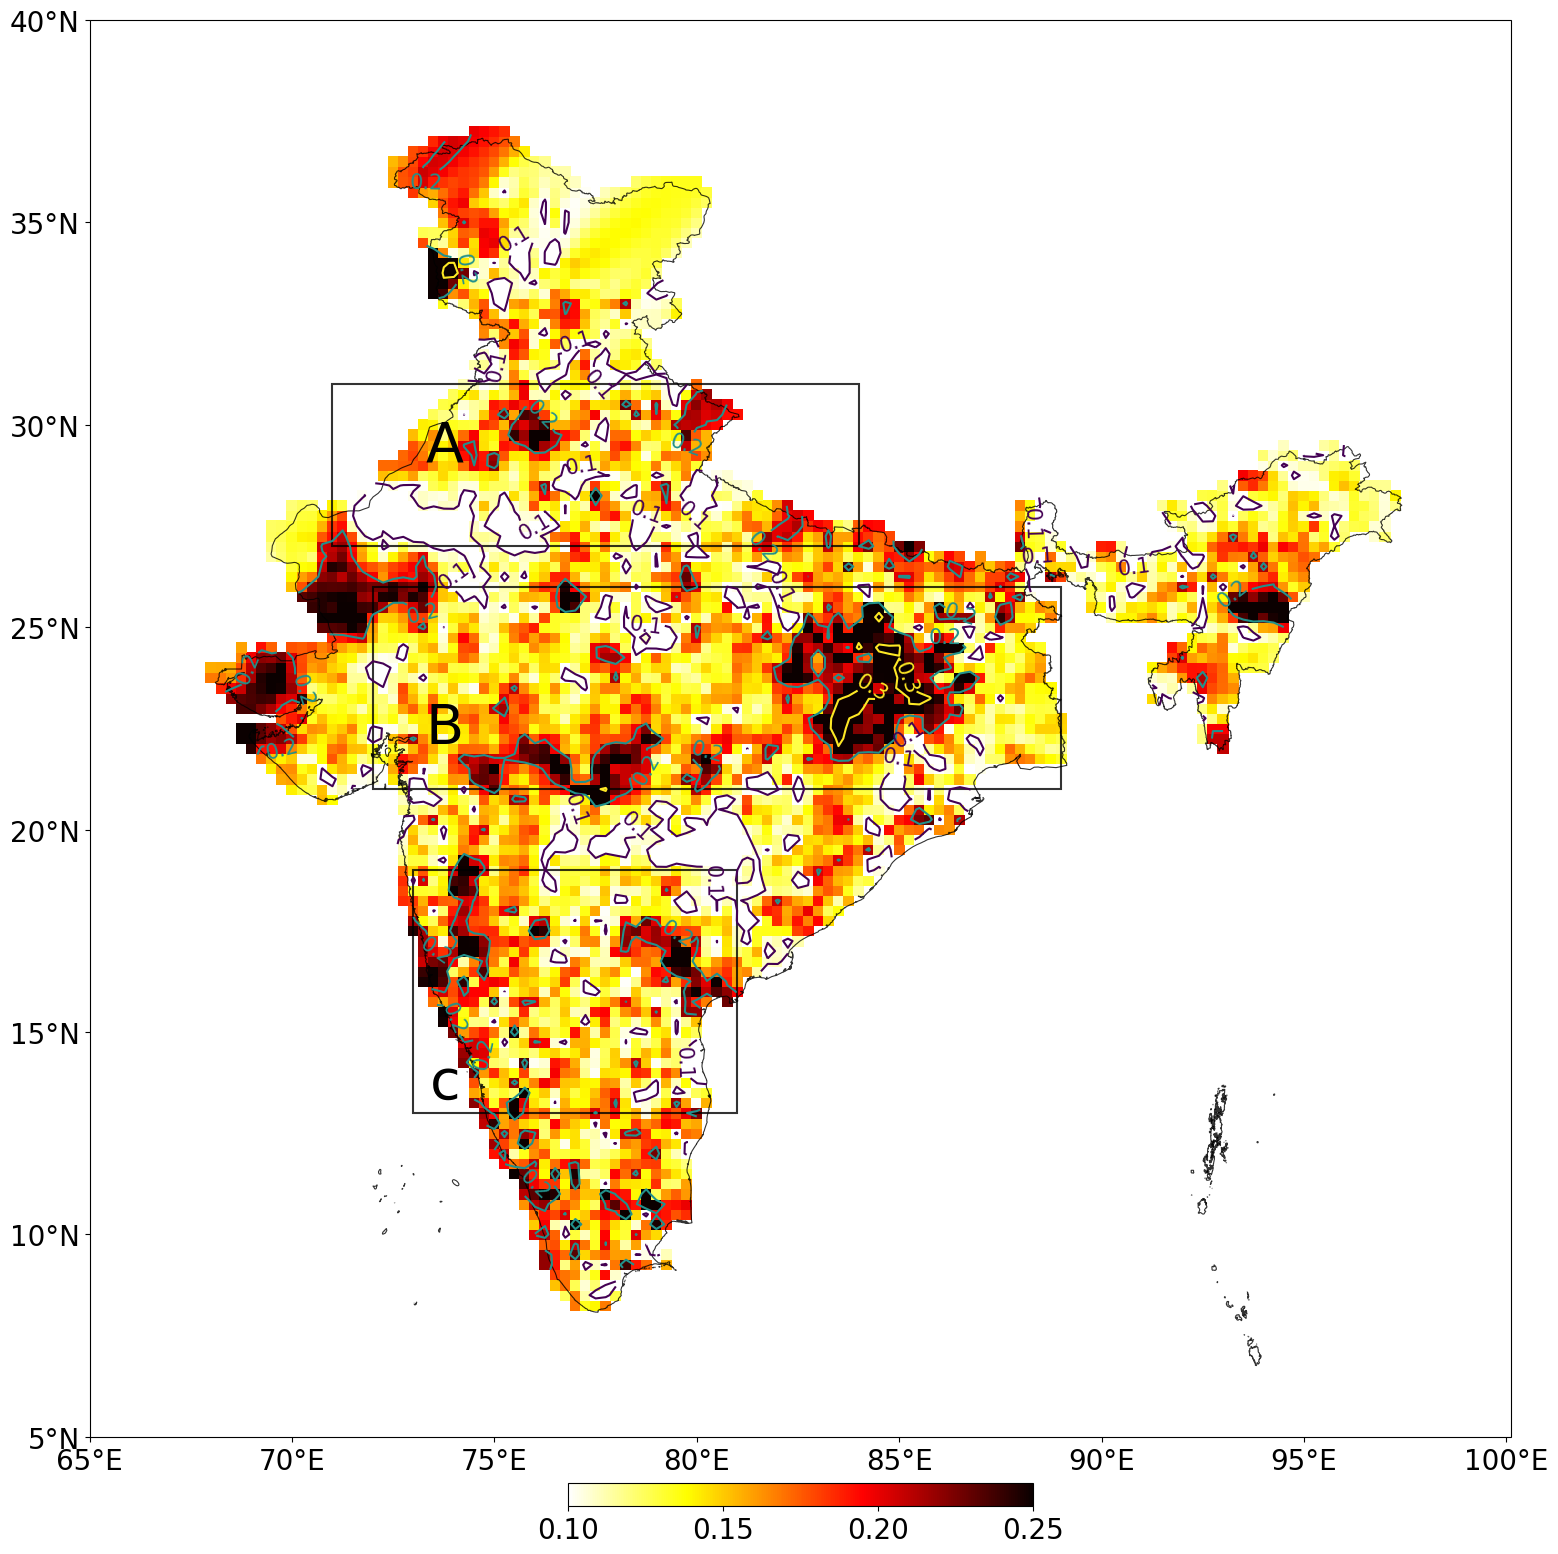

In [87]:
plt.figure(figsize=(20,20))
plt.rcParams['font.size'] = 20
axiom = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180.0))

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
axiom.xaxis.set_major_formatter(lon_formatter)
axiom.yaxis.set_major_formatter(lat_formatter)


cs = axiom.pcolor(ccor_nao_ds.longitude,ccor_nao_ds.latitude,ccor_nao_ds['ccor'],cmap=mpl.cm.get_cmap('hot').reversed(),vmin=0.1,vmax=0.25,transform=ccrs.PlateCarree())
cs1 =axiom.contour(ccor_nao_ds.longitude,ccor_nao_ds.latitude,ccor_nao_ds['ccor'],levels= [0.10,0.20,0.30],color='k',inline= 1,fontsize=19,transform=ccrs.PlateCarree())
axiom.clabel(cs1, inline=1, fontsize=15)
axiom.set_xticks([65, 70, 75, 80 , 85, 90, 95, 100], crs=ccrs.PlateCarree())
axiom.set_yticks([5, 10, 15, 20, 25, 30, 35, 40], crs=ccrs.PlateCarree())
# fname='new_shape/India_Boundary.shp'

# shape_feature = ShapelyFeature(Reader(fname).geometries(),
#                                 ccrs.PlateCarree(), facecolor='none',edgecolor='k')
axiom.add_feature(shape_feature)


## south box
axiom.add_patch(mpatches.Rectangle(xy=[73, 13], width=8, height=6,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                   alpha=.8,
                                   antialiased=True,
                                   transform=ccrs.PlateCarree())
                 ) 
## central 
axiom.add_patch(mpatches.Rectangle(xy=[72, 21], width=17 ,height=5,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                    alpha=.8,
                                   antialiased=True,
                                    transform=ccrs.PlateCarree())
               )

axiom.add_patch(mpatches.Rectangle(xy=[71, 27], width=13 ,height=4,

                   facecolor='None',
                   linewidth='1.5',

                   edgecolor='black',
                    alpha=.8,
                   antialiased=True,
                    transform=ccrs.PlateCarree())
               )
from pylab import figure, text
text(0.25, 0.7,'A', ha='center', va='center',fontsize=40, transform=axiom.transAxes) 
text(0.25, 0.5,'B', ha='center', va='center',fontsize=40, transform=axiom.transAxes)                 
text(0.25, 0.25,'c', ha='center', va='center',fontsize=40, transform=axiom.transAxes)                 

cbar =  plt.colorbar(cs, fraction=0.05,shrink=0.3, orientation='horizontal',pad=0.03)



In [16]:
import nclcmaps2 
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
cmap1=nclcmaps2.cmap('WhiteBlue')
cmap2=nclcmaps2.cmap('MPL_RdYlBu')


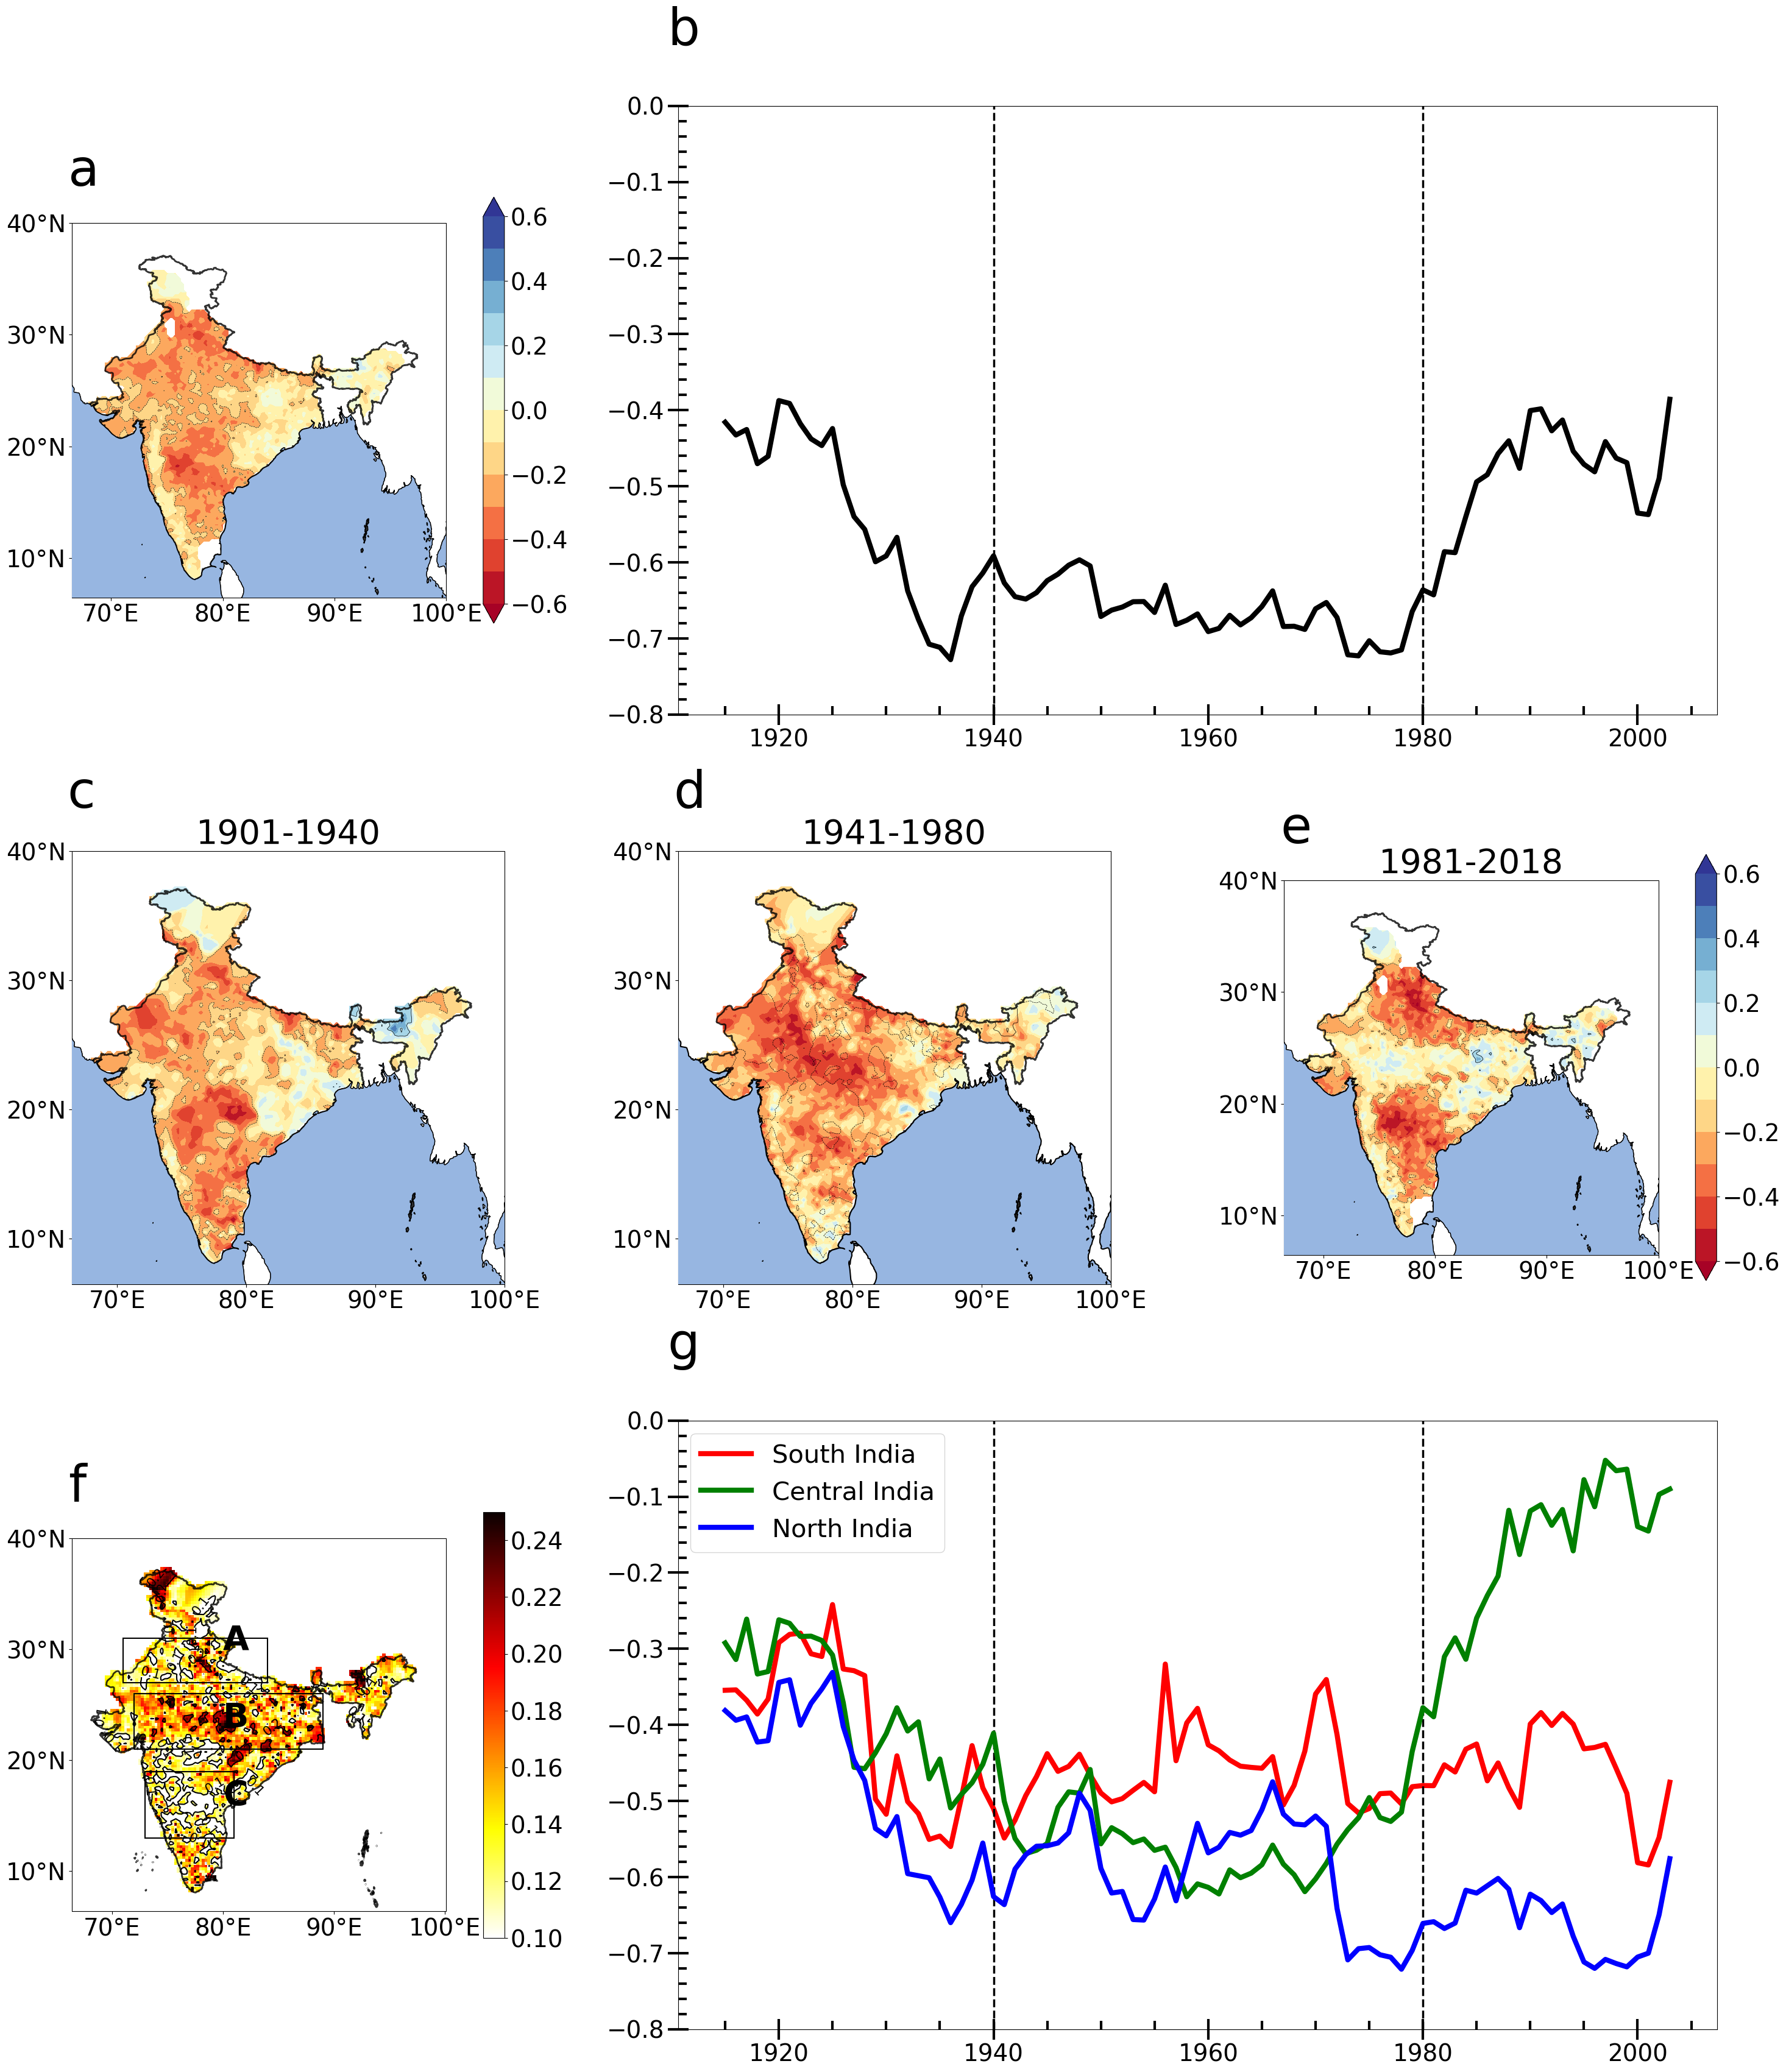

In [41]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from matplotlib.ticker import AutoMinorLocator

proj=ccrs.PlateCarree(central_longitude=180.0)
# fig, axiom = plt.subplots(1,3,figsize=(3,6), subplot_kw=dict(projection=proj))


# plt.figure(figsize=(6, 4))
fig3 = plt.figure(figsize=(40,41))
# plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 28
# plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams["font.weight"] = "normal"
gs = fig3.add_gridspec(3,3, right=0.8, hspace=0.08, wspace=0.4)

ax1 = fig3.add_subplot(gs[0,0],projection=proj)
# ax1 = plt.subplot(gs[0, 0], projection=proj)
v         =    np.arange(-0.6,0.7,0.1)
plotted9=ax1.contourf(lon,lat,corr_map[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax1.contour(lon,lat,corr_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax1.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax1.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.coastlines()
ax1.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax1.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax1.add_feature(shape_feature, linewidth=2)
# ax_cbar1= fig3.add_axes([0, 0.4, 0.1, .1])
plt.colorbar(plotted9,fraction=0.05, shrink=0.7,  ax=ax1,orientation='vertical',pad=0.085)

ax2 = fig3.add_subplot(gs[0, 1:])
# ax2.plot(figsize=(2,2))


ax2.plot(np.arange(1915,2004,1),ccor_all_india, 'k',linewidth=6, label ='All India')
ax2.axvline(x=1940, color='k',linestyle='--',linewidth=2.5)
ax2.axvline(x=1980, color='k',linestyle='--',linewidth=2.5)
ax2.tick_params(which='major', length=25, width=3, direction='inout')
ax2.tick_params(which='minor', length=10, width=3, direction='in')
ax2.set_ylim(-0.80,0.0)


# ax2.xaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
# ax2.xaxis.set_tick_params(direction='inout', labeltop=True) 
# ax2.yaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax2.yaxis.set_tick_params(direction='inout')
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax3 = fig3.add_subplot(gs[1,0])

ax3 = plt.subplot(gs[1, 0], projection=proj)
v         =    np.arange(-0.6,0.7,0.1)
    
ax3.contourf(lon,lat,cor_map[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax3.contour(lon,lat,cor_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax3.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax3.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.coastlines()
ax3.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax3.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax3.add_feature(shape_feature,linewidth=2)
ax3.set_title('1901-1940', size=40)

    
ax4 = fig3.add_subplot(gs[1,1], projection=proj)
ax4.contourf(lon,lat,cor_map2[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax4.contour(lon,lat,cor_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', transform = ccrs.PlateCarree())
ax4.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax4.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.coastlines(linewidth=2)
ax4.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax4.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax4.add_feature(shape_feature,linewidth=2)
ax4.set_title('1941-1980', size=40)

ax5 = fig3.add_subplot(gs[1,2], projection=proj)
ax5.contourf(lon,lat,cor_map3[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax5.contour(lon,lat,cor_map3[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax5.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax5.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
ax5.coastlines()
ax5.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax5.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax5.add_feature(shape_feature,linewidth=2)
ax5.set_title('1981-2018', size=40)
# ax_cbar5= fig3.add_axes([0, 0.4, 0.1, .1])
plt.colorbar(plotted9,fraction=0.05,shrink=0.7,  ax=ax5,orientation='vertical',pad=0.085)

ax6 = fig3.add_subplot(gs[2,0], projection=proj)
# ax6 = fig3.add_subplot(gs[2, 0])
cs=ax6.pcolor(ccor_ds.longitude,ccor_ds.latitude,ccor_ds['ccor'],cmap=mpl.cm.get_cmap('hot').reversed(),vmin=0.1,vmax=0.25,transform=ccrs.PlateCarree())
cs1=ax6.contour(ccor_ds.longitude,ccor_ds.latitude,ccor_ds['ccor'],levels= [0.10,0.20,0.30],colors=['k','k'],inline= 1,fontsize=19,transform=ccrs.PlateCarree())
ax6.clabel(cs1, inline=True, fontsize=15)
ax6.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax6.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
ax6.add_feature(shape_feature, linewidth=2)


## south box
ax6.add_patch(mpatches.Rectangle(xy=[73, 13], width=8, height=6,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                   alpha=1,
                                   antialiased=True,
                                   transform=ccrs.PlateCarree())
                 ) 
## central 
ax6.add_patch(mpatches.Rectangle(xy=[72, 21], width=17 ,height=5,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                    alpha=1,
                                   antialiased=True,
                                    transform=ccrs.PlateCarree())
               )

ax6.add_patch(mpatches.Rectangle(xy=[71, 27], width=13 ,height=4,

                   facecolor='None',
                   linewidth='1.5',

                   edgecolor='black',
                    alpha=1,
                   antialiased=True,
                    transform=ccrs.PlateCarree())
               )
# from pylab import figure, text
# ax6.text(2, 2,'A',fontsize=40)  
# ax6.text(0.1, 0.15,'B', fontsize=40)                  
# ax6.text(0.1, 0.06,'c', fontsize=40)                 
plt.colorbar(cs, fraction=0.05,shrink=0.7, orientation='vertical',pad=0.085)
ax6.text(-100,30,'A', fontsize=40, weight="bold")
ax6.text(-100,23,'B', fontsize=40, weight="bold")
ax6.text(-100,16,'C', fontsize=40, weight="bold")


ax7 = fig3.add_subplot(gs[2, 1:])
plt.rcParams['font.size']=30

# plt.plot(np.arange(1915,2004,1),ccor_all_india, 'k', label ='All India')
ax7.plot(np.arange(1915,2004,1),ccor_south_india, 'r',linewidth=6, label ='South India')

ax7.axvline(x=1940, color='k',linestyle='--',linewidth=2.5)
ax7.axvline(x=1980, color='k',linestyle='--',linewidth=2.5)
ax7.set_ylim(-0.80,0.0)
ax7.legend(loc="best")
ax7.plot(np.arange(1915,2004,1),ccor_central_india, 'g',linewidth=6 ,label ='Central India')
ax7.legend(loc="best")
ax7.plot(np.arange(1915,2004,1),ccor_north_india, 'b',linewidth=6, label ='North India')
ax7.legend(loc="best")    
ax7.tick_params(which='major', length=25, width=3, direction='inout')
ax7.tick_params(which='minor', length=10, width=3, direction='in')


# ax7.xaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax7.xaxis.set_tick_params(direction='inout') 
# ax7.yaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax7.yaxis.set_tick_params(direction='inout')
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(-.01, 1.1, 'a', transform=ax1.transAxes, size=60)
ax2.text(-.01, 1.1, 'b', transform=ax2.transAxes, size=60)
ax3.text(-.01, 1.1, 'c', transform=ax3.transAxes, size=60)
ax4.text(-.01, 1.1, 'd', transform=ax4.transAxes, size=60)
ax5.text(-.01, 1.1, 'e', transform=ax5.transAxes, size=60)
ax6.text(-.01, 1.1, 'f', transform=ax6.transAxes, size=60)
ax7.text(-.01, 1.1, 'g', transform=ax7.transAxes, size=60)

plt.savefig("figure2.png", transparent = True, bbox_inches='tight', dpi=300)
# plt.savefig("figure2.pdf", transparent = True, bbox_inches='tight')


/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'inline', 'fontsize'
  result = super().contour(*args, **kwargs)


Text(-0.01, 1.1, 'g')

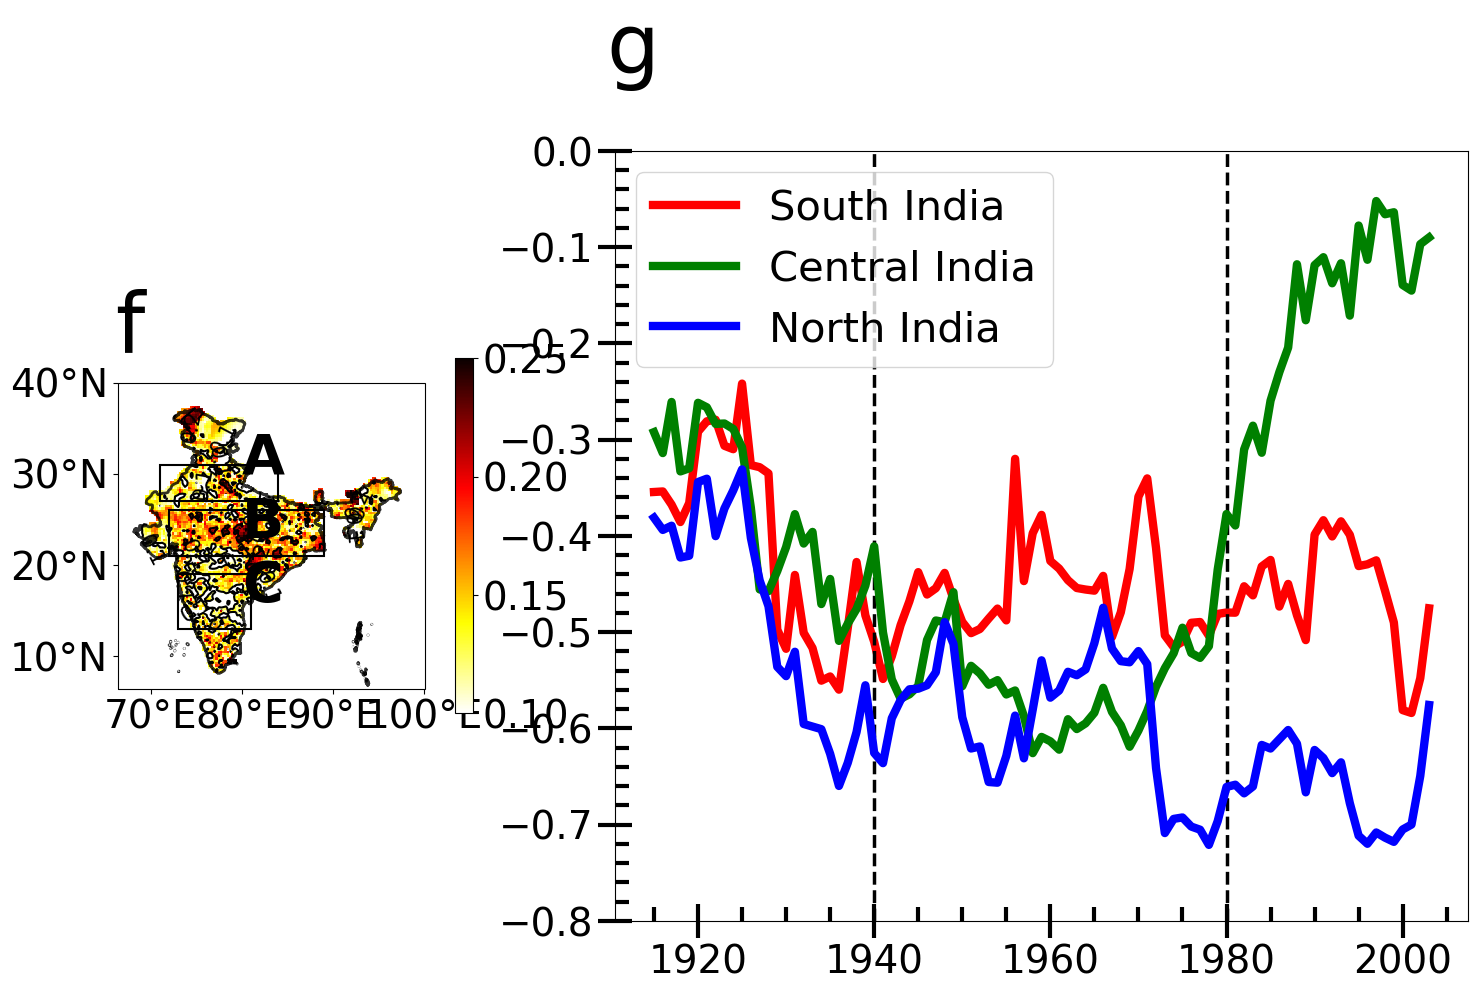

In [88]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from matplotlib.ticker import AutoMinorLocator

proj=ccrs.PlateCarree(central_longitude=180.0)
# fig, axiom = plt.subplots(1,3,figsize=(3,6), subplot_kw=dict(projection=proj))


# plt.figure(figsize=(6, 4))
fig3 = plt.figure(figsize=(20,10))
# plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 28
# plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams["font.weight"] = "normal"
gs = fig3.add_gridspec(1,3, right=0.8, hspace=0.08, wspace=0.4)

# ax1 = fig3.add_subplot(gs[0,0],projection=proj)
# # ax1 = plt.subplot(gs[0, 0], projection=proj)
# v         =    np.arange(-0.6,0.7,0.1)
# plotted9=ax1.contourf(lon,lat,corr_map[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
# ax1.contour(lon,lat,corr_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
# ax1.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
# ax1.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax1.xaxis.set_major_formatter(lon_formatter)
# ax1.yaxis.set_major_formatter(lat_formatter)
# ax1.coastlines()
# ax1.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# # ax1.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
# ax1.add_feature(shape_feature, linewidth=2)
# # ax_cbar1= fig3.add_axes([0, 0.4, 0.1, .1])
# plt.colorbar(plotted9,fraction=0.05, shrink=0.7,  ax=ax1,orientation='vertical',pad=0.085)

# ax2 = fig3.add_subplot(gs[0, 1:])
# # ax2.plot(figsize=(2,2))


# ax2.plot(np.arange(1915,2004,1),ccor_all_india, 'k',linewidth=6, label ='All India')
# ax2.axvline(x=1940, color='k',linestyle='--',linewidth=2.5)
# ax2.axvline(x=1980, color='k',linestyle='--',linewidth=2.5)
# ax2.tick_params(which='major', length=25, width=3, direction='inout')
# ax2.tick_params(which='minor', length=10, width=3, direction='in')
# ax2.set_ylim(-0.80,0.0)


# # ax2.xaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
# # ax2.xaxis.set_tick_params(direction='inout', labeltop=True) 
# # ax2.yaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
# ax2.yaxis.set_tick_params(direction='inout')
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
# ax3 = fig3.add_subplot(gs[1,0])

# ax3 = plt.subplot(gs[1, 0], projection=proj)
# v         =    np.arange(-0.6,0.7,0.1)
    
# ax3.contourf(lon,lat,cor_map[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
# ax3.contour(lon,lat,cor_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
# ax3.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
# ax3.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax3.xaxis.set_major_formatter(lon_formatter)
# ax3.yaxis.set_major_formatter(lat_formatter)
# ax3.coastlines()
# ax3.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# # ax3.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
# ax3.add_feature(shape_feature,linewidth=2)
# ax3.set_title('1901-1940', size=40)

    
# ax4 = fig3.add_subplot(gs[1,1], projection=proj)
# ax4.contourf(lon,lat,cor_map2[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
# ax4.contour(lon,lat,cor_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', transform = ccrs.PlateCarree())
# ax4.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
# ax4.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax4.xaxis.set_major_formatter(lon_formatter)
# ax4.yaxis.set_major_formatter(lat_formatter)
# ax4.coastlines(linewidth=2)
# ax4.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# # ax4.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
# ax4.add_feature(shape_feature,linewidth=2)
# ax4.set_title('1941-1980', size=40)

# ax5 = fig3.add_subplot(gs[1,2], projection=proj)
# ax5.contourf(lon,lat,cor_map3[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
# ax5.contour(lon,lat,cor_map3[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
# ax5.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
# ax5.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax5.xaxis.set_major_formatter(lon_formatter)
# ax5.yaxis.set_major_formatter(lat_formatter)
# ax5.coastlines()
# ax5.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# # ax5.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
# ax5.add_feature(shape_feature,linewidth=2)
# ax5.set_title('1981-2018', size=40)
# # ax_cbar5= fig3.add_axes([0, 0.4, 0.1, .1])
# plt.colorbar(plotted9,fraction=0.05,shrink=0.7,  ax=ax5,orientation='vertical',pad=0.085)

ax6 = fig3.add_subplot(gs[0,0], projection=proj)
# ax6 = fig3.add_subplot(gs[2, 0])
cs=ax6.pcolor(ccor_ds.longitude,ccor_ds.latitude,ccor_ds['ccor'],cmap=mpl.cm.get_cmap('hot').reversed(),vmin=0.1,vmax=0.25,transform=ccrs.PlateCarree())
cs1=ax6.contour(ccor_ds.longitude,ccor_ds.latitude,ccor_ds['ccor'],levels= [0.10,0.20,0.30],colors=['k','k'],inline= 1,fontsize=19,transform=ccrs.PlateCarree())
ax6.clabel(cs1, inline=True, fontsize=15)
ax6.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax6.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
ax6.add_feature(shape_feature, linewidth=2)


## south box
ax6.add_patch(mpatches.Rectangle(xy=[73, 13], width=8, height=6,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                   alpha=1,
                                   antialiased=True,
                                   transform=ccrs.PlateCarree())
                 ) 
## central 
ax6.add_patch(mpatches.Rectangle(xy=[72, 21], width=17 ,height=5,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                    alpha=1,
                                   antialiased=True,
                                    transform=ccrs.PlateCarree())
               )

ax6.add_patch(mpatches.Rectangle(xy=[71, 27], width=13 ,height=4,

                   facecolor='None',
                   linewidth='1.5',

                   edgecolor='black',
                    alpha=1,
                   antialiased=True,
                    transform=ccrs.PlateCarree())
               )
# from pylab import figure, text
# ax6.text(2, 2,'A',fontsize=40)  
# ax6.text(0.1, 0.15,'B', fontsize=40)                  
# ax6.text(0.1, 0.06,'c', fontsize=40)                 
plt.colorbar(cs, fraction=0.05,shrink=0.7, orientation='vertical',pad=0.085)
ax6.text(-100,30,'A', fontsize=40, weight="bold")
ax6.text(-100,23,'B', fontsize=40, weight="bold")
ax6.text(-100,16,'C', fontsize=40, weight="bold")


ax7 = fig3.add_subplot(gs[0, 1:])
plt.rcParams['font.size']=30

# plt.plot(np.arange(1915,2004,1),ccor_all_india, 'k', label ='All India')
ax7.plot(np.arange(1915,2004,1),ccor_south_india, 'r',linewidth=6, label ='South India')

ax7.axvline(x=1940, color='k',linestyle='--',linewidth=2.5)
ax7.axvline(x=1980, color='k',linestyle='--',linewidth=2.5)
ax7.set_ylim(-0.80,0.0)
ax7.legend(loc="best")
ax7.plot(np.arange(1915,2004,1),ccor_central_india, 'g',linewidth=6 ,label ='Central India')
ax7.legend(loc="best")
ax7.plot(np.arange(1915,2004,1),ccor_north_india, 'b',linewidth=6, label ='North India')
ax7.legend(loc="best")    
ax7.tick_params(which='major', length=25, width=3, direction='inout')
ax7.tick_params(which='minor', length=10, width=3, direction='in')


# ax7.xaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax7.xaxis.set_tick_params(direction='inout') 
# ax7.yaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax7.yaxis.set_tick_params(direction='inout')
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(-.01, 1.1, 'a', transform=ax1.transAxes, size=60)
ax2.text(-.01, 1.1, 'b', transform=ax2.transAxes, size=60)
ax3.text(-.01, 1.1, 'c', transform=ax3.transAxes, size=60)
ax4.text(-.01, 1.1, 'd', transform=ax4.transAxes, size=60)
ax5.text(-.01, 1.1, 'e', transform=ax5.transAxes, size=60)
ax6.text(-.01, 1.1, 'f', transform=ax6.transAxes, size=60)
ax7.text(-.01, 1.1, 'g', transform=ax7.transAxes, size=60)

# plt.savefig("figure2.png", transparent = True, bbox_inches='tight', dpi=300)
# plt.savefig("figure2.pdf", transparent = True, bbox_inches='tight')


In [97]:
data3 = "/home/cccr/roxy/athira/detrends.nc"
b3 = xr.open_dataset(data3)


nao1 = nao_df.loc['1901-07-01':'1940-07-01']
w11= nao1.values.squeeze()
nao2 = nao_df.loc['1941-07-01':'1980-07-01']
w22= nao2.values.squeeze()
nao3 = nao_df.loc['1981-07-01':'2018-07-01']
w33= nao3.values.squeeze()
# nao4 = nao_df.loc[time=slice['1991-06-01','2018-09-30']]
# s4= nao4.values.squeeze[]
# w4 = s4.ravel[]

In [100]:
data1 = "/home/cccr/roxy/athira/imddetrend.nc"
data_f = xr.open_dataset(data1)
data = data_f.rf.values
rain1 = data_f.rf.sel(time=slice('1901-06-01','1940-09-30'))
r=rain1.squeeze()


lon = data_f.longitude
lat = data_f.latitude
print(lon.shape)
shape = [1,r.shape[1],r.shape[2]]
regress_map = np.zeros((shape))
cor_nao_map = np.zeros((shape))
significant_map =np.zeros((shape))
 
for i in range(r.shape[2]):
    for j in range(r.shape[1]): 
        temp1= r[:,j,i]
        if np.all(np.isnan(temp1)):
            regress_map[0,j,i]= np.nan
            cor_nao_map[0,j,i]    = np.nan
        else:
            slope,intercept,corr,p1,serr = stats.linregress(w11,temp1)
            regress_map[0,j,i]= slope
            cor_nao_map[0,j,i]    = corr
            significant_map[0,j,i] = p1
            
rain2 = data_f.rf.sel(time=slice('1941-06-01','1980-09-30'))
r2=rain2.squeeze()
shape2 = [1,r2.shape[1],r2.shape[2]]
regress_map2 = np.zeros((shape2))
cor_nao_map2 = np.zeros((shape2))
significant_map2 =np.zeros((shape2))
 
for i in range(r2.shape[2]):
    for j in range(r2.shape[1]): 
        temp2= r2[:,j,i]
        if np.all(np.isnan(temp2)):
            regress_map2[0,j,i]= np.nan
            cor_nao_map2[0,j,i]    = np.nan
        else:
            slope2,intercept2,corr2,p2,serr2 = stats.linregress(w22,temp2)
            regress_map2[0,j,i]= slope2
            cor_nao_map2[0,j,i]    = corr2
            significant_map2[0,j,i] = p2
            
rain3 = data_f.rf.sel(time=slice('1981-06-01','2018-09-30'))
r3=rain3.squeeze()
shape3 = [1,r3.shape[1],r3.shape[2]]
regress_map3 = np.zeros((shape3))
cor_nao_map3 = np.zeros((shape3))
significant_map3 =np.zeros((shape3))
 
for i in range(r3.shape[2]):
    for j in range(r3.shape[1]): 
        temp3= r3[:,j,i]
        if np.all(np.isnan(temp3)):
            regress_map3[0,j,i]= np.nan
            cor_nao_map3[0,j,i]    = np.nan
        else:
            slope3,intercept3,corr3,p3,serr3 = stats.linregress(w33,temp3)
            regress_map3[0,j,i]= slope3
            cor_nao_map3[0,j,i]    = corr3
            significant_map3[0,j,i] = p3
            

(135,)


Text(-0.01, 1.1, 'e')

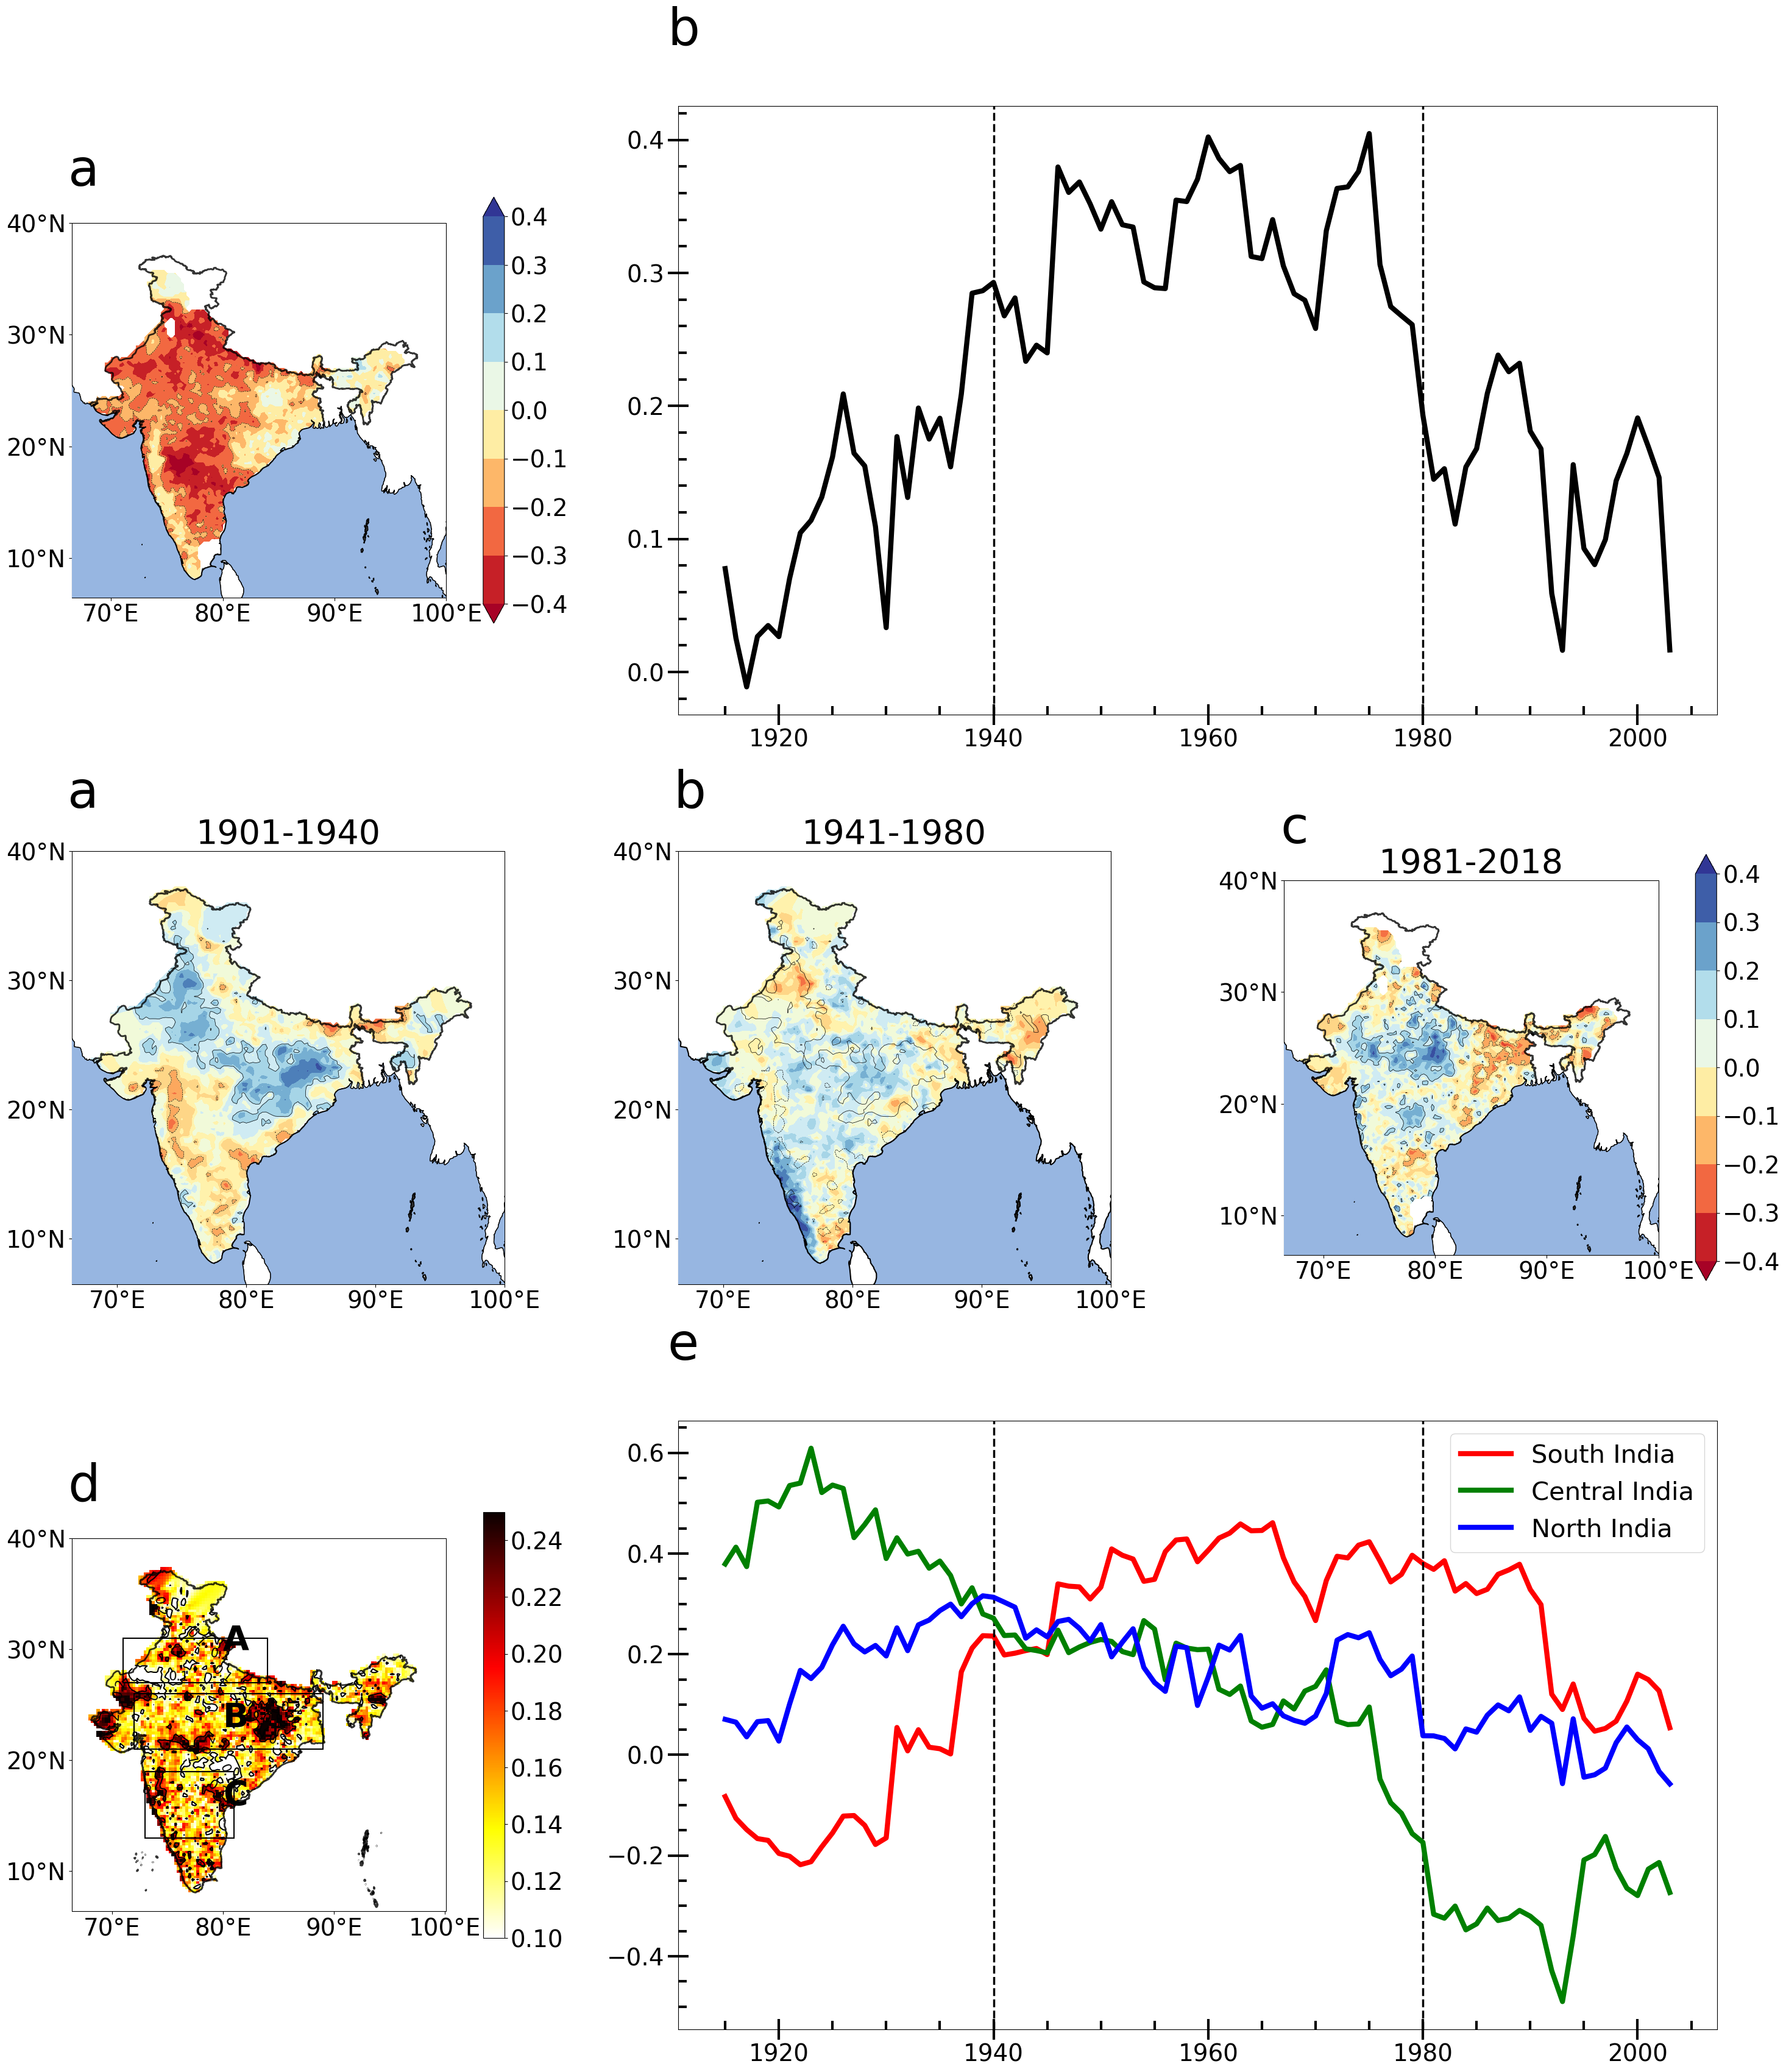

In [105]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from matplotlib.ticker import AutoMinorLocator

proj=ccrs.PlateCarree(central_longitude=180.0)
# fig, axiom = plt.subplots(1,3,figsize=(3,6), subplot_kw=dict(projection=proj))


# plt.figure(figsize=(6, 4))
fig3 = plt.figure(figsize=(40,41))
# plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 28
# plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams["font.weight"] = "normal"
gs = fig3.add_gridspec(3,3, right=0.8, hspace=0.08, wspace=0.4)

ax1 = fig3.add_subplot(gs[0,0],projection=proj)
# ax1 = plt.subplot(gs[0, 0], projection=proj)
v         =    np.arange(-0.4,0.5,0.1)
plotted9=ax1.contourf(lon,lat,corr_map[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax1.contour(lon,lat,corr_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax1.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax1.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.coastlines()
ax1.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax1.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax1.add_feature(shape_feature, linewidth=2)
# ax_cbar1= fig3.add_axes([0, 0.4, 0.1, .1])
plt.colorbar(plotted9,fraction=0.05, shrink=0.7,  ax=ax1,orientation='vertical',pad=0.085)

ax2 = fig3.add_subplot(gs[0, 1:])
# ax2.plot(figsize=(2,2))


ax2.plot(np.arange(1915,2004,1),ccor_nao_all_india, 'k',linewidth=6, label ='All India')
ax2.axvline(x=1940, color='k',linestyle='--',linewidth=2.5)
ax2.axvline(x=1980, color='k',linestyle='--',linewidth=2.5)
ax2.tick_params(which='major', length=25, width=3, direction='inout')
ax2.tick_params(which='minor', length=10, width=3, direction='in')
# ax2.set_ylim(-0.80,0.0)


# ax2.xaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
# ax2.xaxis.set_tick_params(direction='inout', labeltop=True) 
# ax2.yaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax2.yaxis.set_tick_params(direction='inout')
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax3 = fig3.add_subplot(gs[1,0])

ax3 = plt.subplot(gs[1, 0], projection=proj)
v         =    np.arange(-0.6,0.7,0.1)
    
ax3.contourf(lon,lat,cor_nao_map[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax3.contour(lon,lat,cor_nao_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax3.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax3.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.coastlines()
ax3.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax3.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax3.add_feature(shape_feature,linewidth=2)
ax3.set_title('1901-1940', size=40)

    
ax4 = fig3.add_subplot(gs[1,1], projection=proj)
ax4.contourf(lon,lat,cor_nao_map2[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax4.contour(lon,lat,cor_nao_map[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', transform = ccrs.PlateCarree())
ax4.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax4.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.yaxis.set_major_formatter(lat_formatter)
ax4.coastlines(linewidth=2)
ax4.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax4.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax4.add_feature(shape_feature,linewidth=2)
ax4.set_title('1941-1980', size=40)

ax5 = fig3.add_subplot(gs[1,2], projection=proj)
ax5.contourf(lon,lat,cor_nao_map3[0,:,:],v, cmap=cmap2,extend='both',transform = ccrs.PlateCarree())
ax5.contour(lon,lat,cor_nao_map3[0,:,:],levels=[-1*0.2,0.2], linewidths=0.5, colors='black', antialiased=True,transform = ccrs.PlateCarree())
ax5.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax5.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax5.xaxis.set_major_formatter(lon_formatter)
ax5.yaxis.set_major_formatter(lat_formatter)
ax5.coastlines()
ax5.add_feature(cart.feature.OCEAN, zorder=100, edgecolor='k')
# ax5.add_feature(cartopy.feature.BORDERS.with_scale('50m'))
ax5.add_feature(shape_feature,linewidth=2)
ax5.set_title('1981-2018', size=40)
# ax_cbar5= fig3.add_axes([0, 0.4, 0.1, .1])
plt.colorbar(plotted9,fraction=0.05,shrink=0.7,  ax=ax5,orientation='vertical',pad=0.085)

ax6 = fig3.add_subplot(gs[2,0], projection=proj)
# ax6 = fig3.add_subplot(gs[2, 0])
cs=ax6.pcolor(ccor_nao_ds.longitude,ccor_nao_ds.latitude,ccor_nao_ds['ccor'],cmap=mpl.cm.get_cmap('hot').reversed(),vmin=0.1,vmax=0.25,transform=ccrs.PlateCarree())
cs1=ax6.contour(ccor_nao_ds.longitude,ccor_nao_ds.latitude,ccor_nao_ds['ccor'],levels= [0.10,0.20,0.30],colors=['k','k'],inline= 1,fontsize=19,transform=ccrs.PlateCarree())
ax6.clabel(cs1, inline=True, fontsize=15)
ax6.set_xticks([ 70, 80 , 90, 100], crs=ccrs.PlateCarree())
ax6.set_yticks([ 10, 20, 30, 40], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax6.xaxis.set_major_formatter(lon_formatter)
ax6.yaxis.set_major_formatter(lat_formatter)
ax6.add_feature(shape_feature, linewidth=2)


## south box
ax6.add_patch(mpatches.Rectangle(xy=[73, 13], width=8, height=6,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                   alpha=1,
                                   antialiased=True,
                                   transform=ccrs.PlateCarree())
                 ) 
## central 
ax6.add_patch(mpatches.Rectangle(xy=[72, 21], width=17 ,height=5,
                                   
                                   facecolor='None',
                                   linewidth='1.5',
                                   
                                   edgecolor='black',
                                    alpha=1,
                                   antialiased=True,
                                    transform=ccrs.PlateCarree())
               )

ax6.add_patch(mpatches.Rectangle(xy=[71, 27], width=13 ,height=4,

                   facecolor='None',
                   linewidth='1.5',

                   edgecolor='black',
                    alpha=1,
                   antialiased=True,
                    transform=ccrs.PlateCarree())
               )
# from pylab import figure, text
# ax6.text(2, 2,'A',fontsize=40)  
# ax6.text(0.1, 0.15,'B', fontsize=40)                  
# ax6.text(0.1, 0.06,'c', fontsize=40)                 
plt.colorbar(cs, fraction=0.05,shrink=0.7, orientation='vertical',pad=0.085)
ax6.text(-100,30,'A', fontsize=40, weight="bold")
ax6.text(-100,23,'B', fontsize=40, weight="bold")
ax6.text(-100,16,'C', fontsize=40, weight="bold")


ax7 = fig3.add_subplot(gs[2, 1:])
plt.rcParams['font.size']=30

# plt.plot(np.arange(1915,2004,1),ccor_nao_all_india, 'k', label ='All India')
ax7.plot(np.arange(1915,2004,1),ccor_nao_south_india, 'r',linewidth=6, label ='South India')

ax7.axvline(x=1940, color='k',linestyle='--',linewidth=2.5)
ax7.axvline(x=1980, color='k',linestyle='--',linewidth=2.5)
# ax7.set_ylim(-0.80,0.0)
ax7.legend(loc="best")
ax7.plot(np.arange(1915,2004,1),ccor_nao_central_india, 'g',linewidth=6 ,label ='Central India')
ax7.legend(loc="best")
ax7.plot(np.arange(1915,2004,1),ccor_nao_north_india, 'b',linewidth=6, label ='North India')
ax7.legend(loc="best")    
ax7.tick_params(which='major', length=25, width=3, direction='inout')
ax7.tick_params(which='minor', length=10, width=3, direction='in')


# ax7.xaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax7.xaxis.set_tick_params(direction='inout') 
# ax7.yaxis.set_ticks_position('both')  # Adding ticks to both top and bottom
ax7.yaxis.set_tick_params(direction='inout')
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(-.01, 1.1, 'a', transform=ax1.transAxes, size=60)
ax2.text(-.01, 1.1, 'b', transform=ax2.transAxes, size=60)
ax3.text(-.01, 1.1, 'a', transform=ax3.transAxes, size=60)
ax4.text(-.01, 1.1, 'b', transform=ax4.transAxes, size=60)
ax5.text(-.01, 1.1, 'c', transform=ax5.transAxes, size=60)
ax6.text(-.01, 1.1, 'd', transform=ax6.transAxes, size=60)
ax7.text(-.01, 1.1, 'e', transform=ax7.transAxes, size=60)

# plt.savefig("figure2.png", transparent = True, bbox_inches='tight', dpi=300)
# plt.savefig("figure2.pdf", transparent = True, bbox_inches='tight')
